<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_1951-2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1994]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1995]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

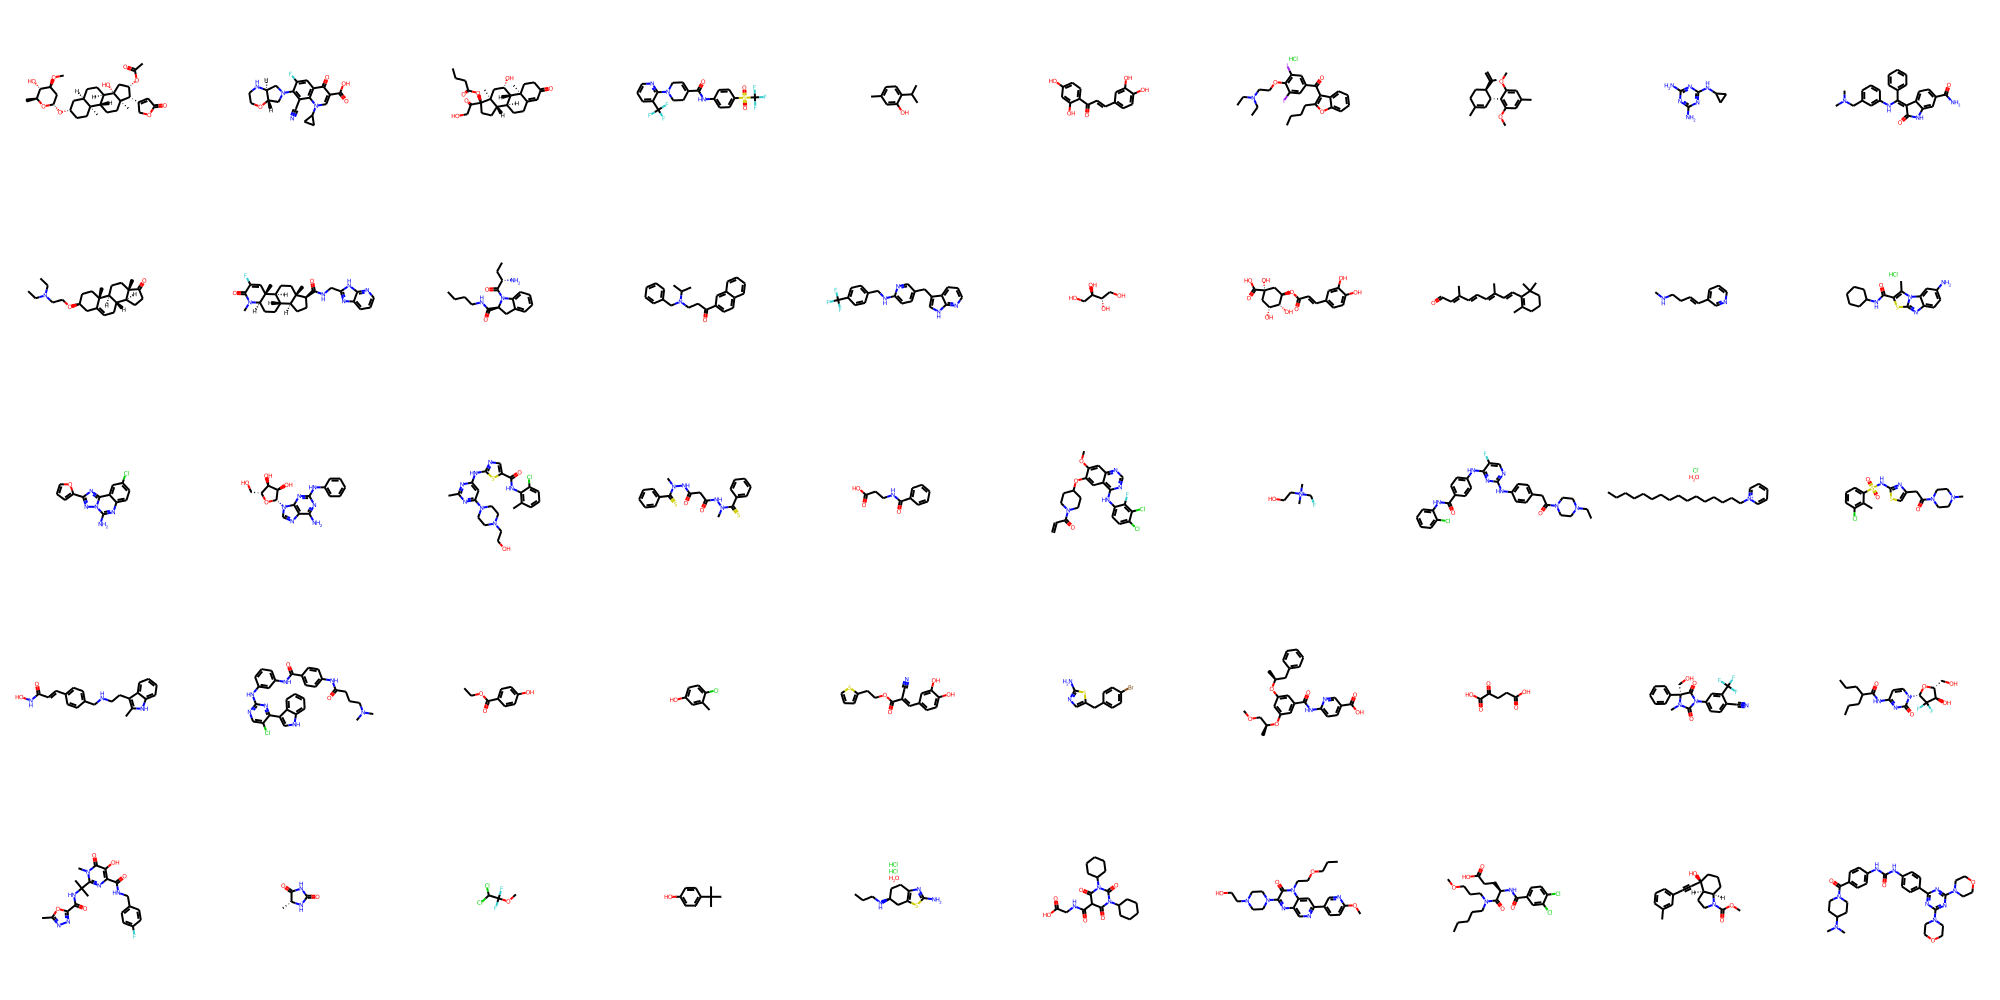

In [1996]:
smiles_list = [

'CO[C@H]1C[C@H](O[C@H]2CC[C@]3(C)[C@H]4CC[C@]5(C)[C@@H](C6=CC(=O)OC6)[C@@H](OC(C)=O)C[C@]5(O)[C@@H]4CC[C@@H]3C2)O[C@@H](C)[C@@H]1O',
'N#Cc1c(N2C[C@@H]3NCCO[C@H]3C2)c(F)cc2c(=O)c(C(=O)O)cn(C3CC3)c12',
'CCCC(=O)O[C@]1(C(=O)CO)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3[C@@H](O)C[C@@]21C',
'O=C(Nc1ccc(S(=O)(=O)C(F)(F)F)cc1)C1=CCN(c2ncccc2C(F)(F)F)CC1',
'Cc1ccc(C(C)C)c(O)c1',
'O=C(/C=C/c1ccc(O)c(O)c1)c1ccc(O)cc1O',
'CCCCc1oc2ccccc2c1C(=O)c1cc(I)c(OCCN(CC)CC)c(I)c1.Cl',
'C=C(C)[C@@H]1CCC(C)=C[C@H]1c1c(OC)cc(C)cc1OC',
'Nc1nc(N)nc(NC2CC2)n1',
'CN(C)Cc1cccc(N/C(=C2\C(=O)Nc3cc(C(N)=O)ccc32)c2ccccc2)c1',
'CCN(CC)CCO[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@H]4CCC(=O)[C@@]4(C)CC[C@@H]32)C1',
'CN1C(=O)C(F)=C[C@]2(C)[C@H]3CC[C@]4(C)[C@@H](C(=O)NCc5nc6cccnc6[nH]5)CC[C@H]4[C@@H]3CC[C@@H]12',
'CCCCNC(=O)[C@@H]1Cc2ccccc2N1C(=O)[C@@H](N)CC',
'CC(C)N(CCC(=O)c1ccc2ccccc2c1)Cc1ccccc1',
'FC(F)(F)c1ccc(CNc2ccc(Cc3c[nH]c4ncccc34)cn2)cc1',
'OC[C@H](O)[C@H](O)CO',
'O=C(/C=C/c1ccc(O)c(O)c1)O[C@@H]1C[C@](O)(C(=O)O)C[C@@H](O)[C@H]1O',
'CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C=O)C(C)(C)CCC1',
'CNCC/C=C/c1cccnc1',
'Cc1c(C(=O)NC2CCCCC2)sc2nc3ccc(N)cc3n12.Cl',
'Nc1nc2ccc(Cl)cc2c2nc(-c3ccco3)nn12',
'Nc1nc(Nc2ccccc2)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
'Cc1nc(Nc2ncc(C(=O)Nc3c(C)cccc3Cl)s2)cc(N2CCN(CCO)CC2)n1',
'CN(NC(=O)CC(=O)NN(C)C(=S)c1ccccc1)C(=S)c1ccccc1',
'O=C(O)CCNC(=O)c1ccccc1',
'C=CC(=O)N1CCC(Oc2cc3c(Nc4ccc(Cl)c(Cl)c4F)ncnc3cc2OC)CC1',
'C[N+](C)(CF)CCO',
'CCN1CCN(C(=O)Cc2ccc(Nc3ncc(F)c(Nc4ccc(C(=O)Nc5ccccc5Cl)cc4)n3)cc2)CC1',
'CCCCCCCCCCCCCCCC[n+]1ccccc1.O.[Cl-]',
'Cc1c(Cl)cccc1S(=O)(=O)Nc1nc(CC(=O)N2CCN(C)CC2)cs1',
'Cc1[nH]c2ccccc2c1CCNCc1ccc(/C=C/C(=O)NO)cc1',
'CN(C)CCCC(=O)Nc1ccc(C(=O)Nc2cccc(Nc3ncc(Cl)c(-c4c[nH]c5ccccc45)n3)c2)cc1',
'CCOC(=O)c1ccc(O)cc1',
'Cc1cc(O)ccc1Cl',
'N#C/C(=C\c1ccc(O)c(O)c1)C(=O)OCCc1cccs1',
'Nc1ncc(Cc2ccc(Br)cc2)s1',
'COC[C@H](C)Oc1cc(O[C@@H](C)Cc2ccccc2)cc(C(=O)Nc2ccc(C(=O)O)cn2)c1',
'O=C(O)CCC(=O)C(=O)O',
'CN1C(=O)N(c2ccc(C#N)c(C(F)(F)F)c2)C(=O)[C@]1(CO)c1ccccc1',
'CCCC(CCC)C(=O)Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)C2(F)F)c(=O)n1',
'Cc1nnc(C(=O)NC(C)(C)c2nc(C(=O)NCc3ccc(F)cc3)c(O)c(=O)n2C)o1',
'C[C@H]1NC(=O)NC1=O',
'COC(F)(F)C(Cl)Cl',
'CC(C)(C)c1ccc(O)cc1',
'CCCN[C@H]1CCc2nc(N)sc2C1.Cl.Cl.O',
'O=C(O)CNC(=O)C1C(=O)N(C2CCCCC2)C(=O)N(C2CCCCC2)C1=O',
'CCCOCCn1c(=O)c(N2CCN(CCO)CC2)nc2cnc(-c3ccc(OC)nc3)cc21',
'CCCCCN(CCCOC)C(=O)[C@@H](CCC(=O)O)NC(=O)c1ccc(Cl)c(Cl)c1',
'COC(=O)N1CC[C@@H]2[C@H]1CCC[C@@]2(O)C#Cc1cccc(C)c1',
'CN(C)C1CCN(C(=O)c2ccc(NC(=O)Nc3ccc(-c4nc(N5CCOCC5)nc(N5CCOCC5)n4)cc3)cc2)CC1',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



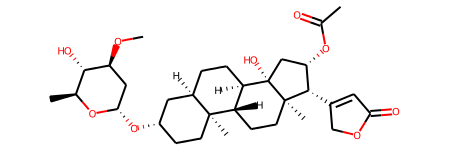

In [1997]:
M1 = mol_list [0]
M1

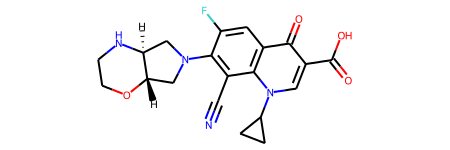

In [1998]:
M2 = mol_list [1]
M2

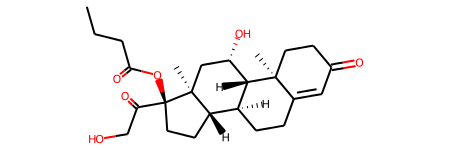

In [1999]:
M3 = mol_list [2]
M3

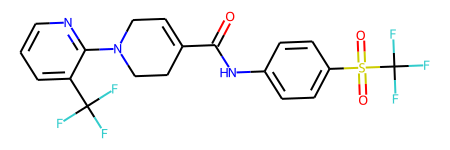

In [2000]:
M4 = mol_list [3]
M4

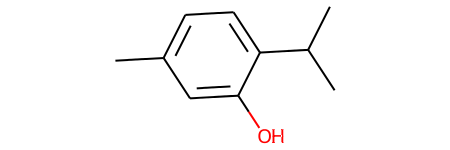

In [2001]:
M5 = mol_list [4]
M5

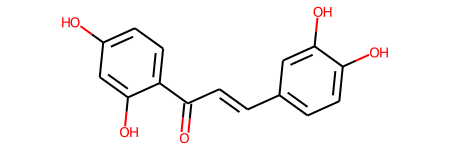

In [2002]:
M6 = mol_list [5]
M6

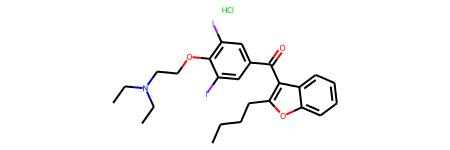

In [2003]:
M7 = mol_list [6]
M7

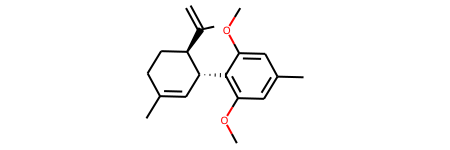

In [2004]:
M8 = mol_list [7]
M8

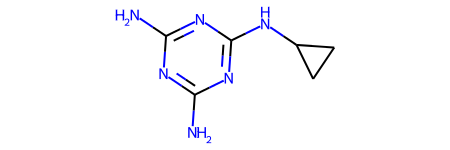

In [2005]:
M9 = mol_list [8]
M9

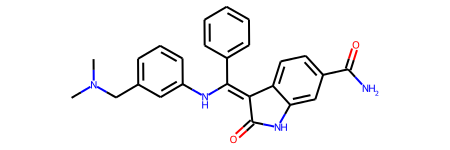

In [2006]:
M10 = mol_list [9]
M10

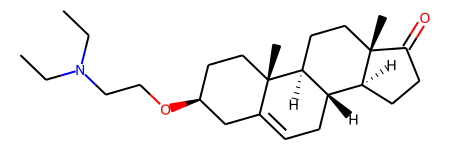

In [2007]:
M11 = mol_list [10]
M11

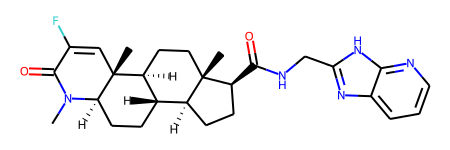

In [2008]:
M12 = mol_list [11]
M12

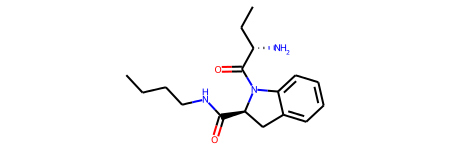

In [2009]:
M13 = mol_list [12]
M13

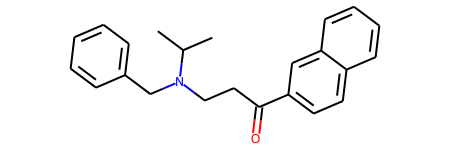

In [2010]:
M14 = mol_list [13]
M14

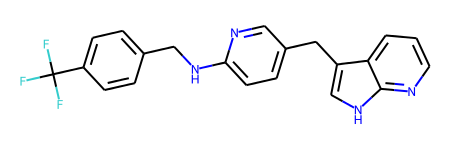

In [2011]:
M15 = mol_list [14]
M15

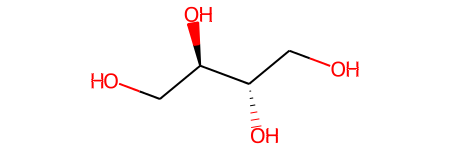

In [2012]:
M16 = mol_list [15]
M16

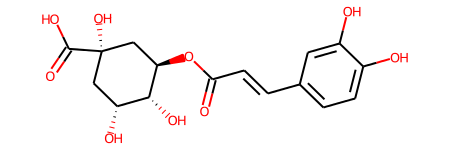

In [2013]:
M17 = mol_list [16]
M17

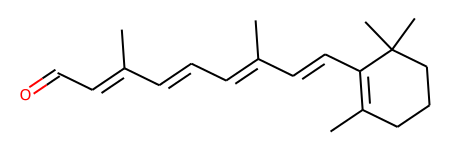

In [2014]:
M18 = mol_list [17]
M18

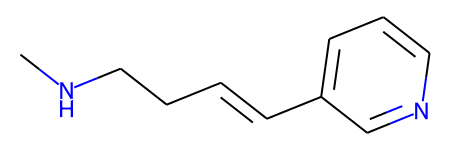

In [2015]:
M19 = mol_list [18]
M19

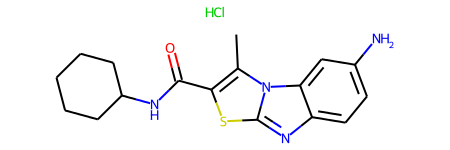

In [2016]:
M20 = mol_list [19]
M20

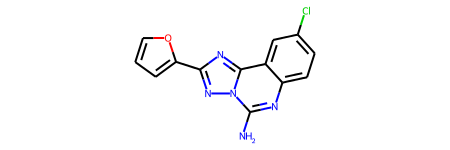

In [2017]:
M21 = mol_list [20]
M21

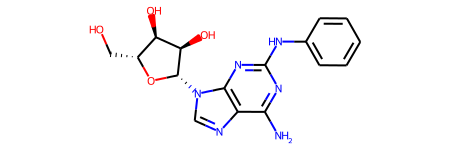

In [2018]:
M22 = mol_list [21]
M22

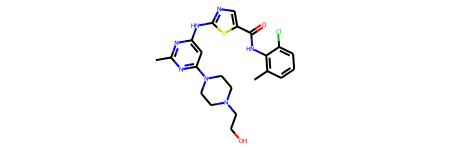

In [2019]:
M23 = mol_list [22]
M23

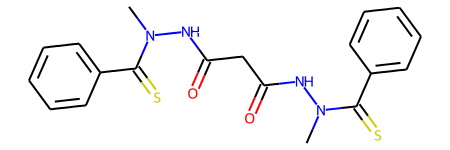

In [2020]:
M24 = mol_list [23]
M24

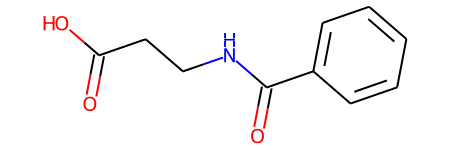

In [2021]:
M25 = mol_list [24]
M25

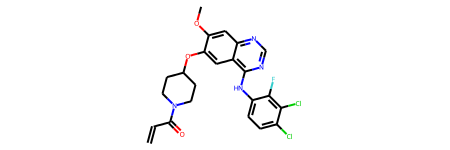

In [2022]:
M26 = mol_list [25]
M26

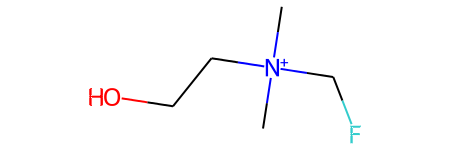

In [2023]:
M27 = mol_list [26]
M27

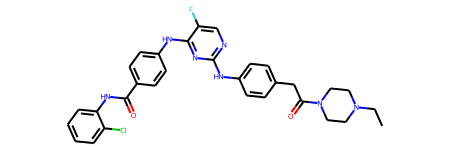

In [2024]:
M28 = mol_list [27]
M28

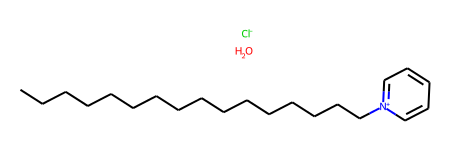

In [2025]:
M29 = mol_list [28]
M29

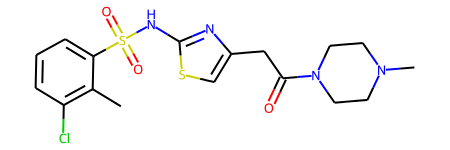

In [2026]:
M30 = mol_list [29]
M30

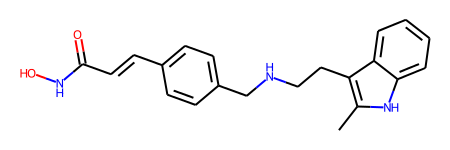

In [2027]:
M31 = mol_list [30]
M31

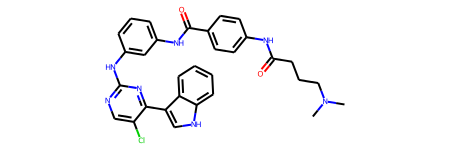

In [2028]:
M32 = mol_list [31]
M32

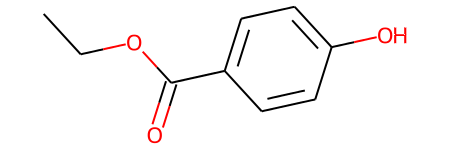

In [2029]:
M33 = mol_list [32]
M33

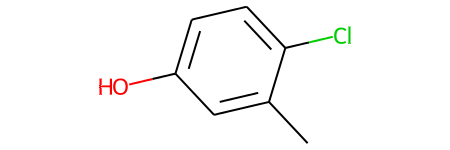

In [2030]:
M34 = mol_list [33]
M34

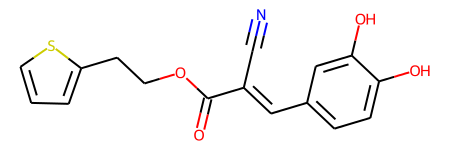

In [2031]:
M35 = mol_list [34]
M35

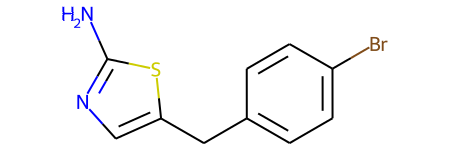

In [2032]:
M36 = mol_list [35]
M36

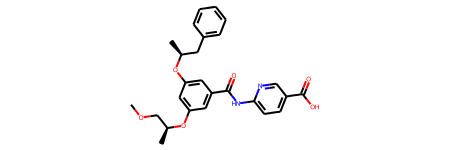

In [2033]:
M37= mol_list [36]
M37

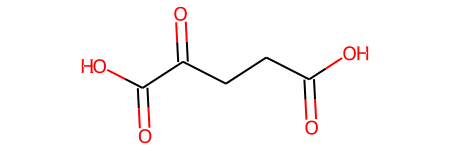

In [2034]:
M38= mol_list [37]
M38

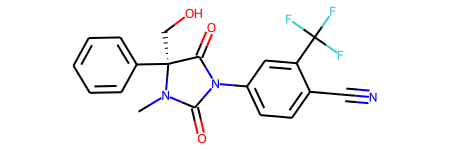

In [2035]:
M39= mol_list [38]
M39

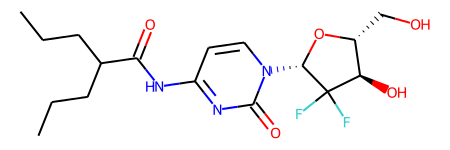

In [2036]:
M40= mol_list [39]
M40

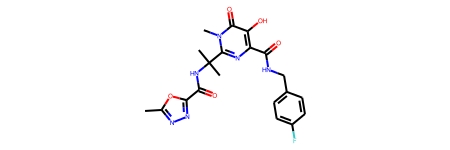

In [2037]:
M41= mol_list [40]
M41

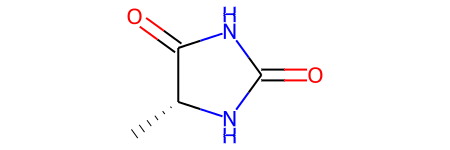

In [2038]:
M42= mol_list [41]
M42

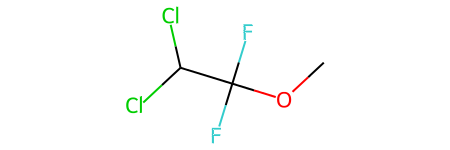

In [2039]:
M43= mol_list [42]
M43

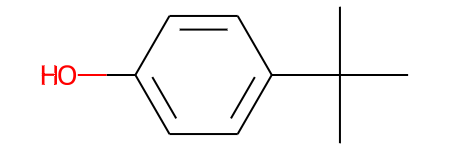

In [2040]:
M44= mol_list [43]
M44

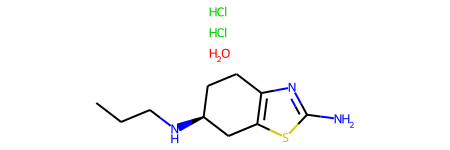

In [2041]:
M45= mol_list [44]
M45

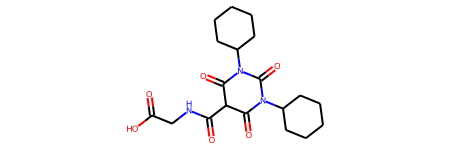

In [2042]:
M46= mol_list [45]
M46

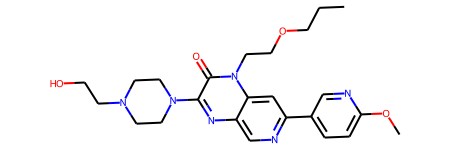

In [2043]:
M47= mol_list [46]
M47

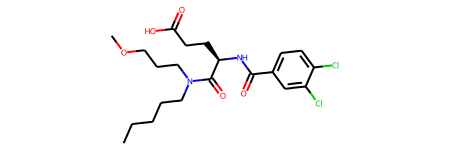

In [2044]:
M48= mol_list [47]
M48

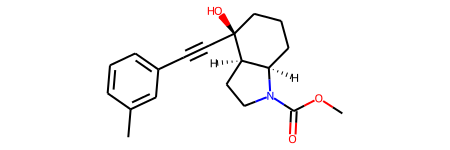

In [2045]:
M49= mol_list [48]
M49

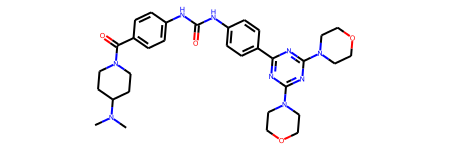

In [2046]:
M50= mol_list [49]
M50

In [2047]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[2,
 11,
 20,
 33,
 36,
 57,
 75,
 77,
 84,
 102,
 109,
 119,
 130,
 138,
 144,
 157,
 214,
 233,
 245,
 250,
 268,
 285,
 301,
 313,
 314,
 324,
 356,
 357,
 368,
 412,
 421,
 441,
 453,
 463,
 468,
 485,
 493,
 511,
 519,
 521,
 528,
 529,
 550,
 555,
 562,
 589,
 595,
 609,
 650,
 656,
 673,
 679,
 682,
 687,
 695,
 722,
 745,
 754,
 798,
 805,
 807,
 811,
 841,
 842,
 849,
 893,
 897,
 926,
 927,
 937,
 956,
 964,
 1008,
 1017,
 1019]

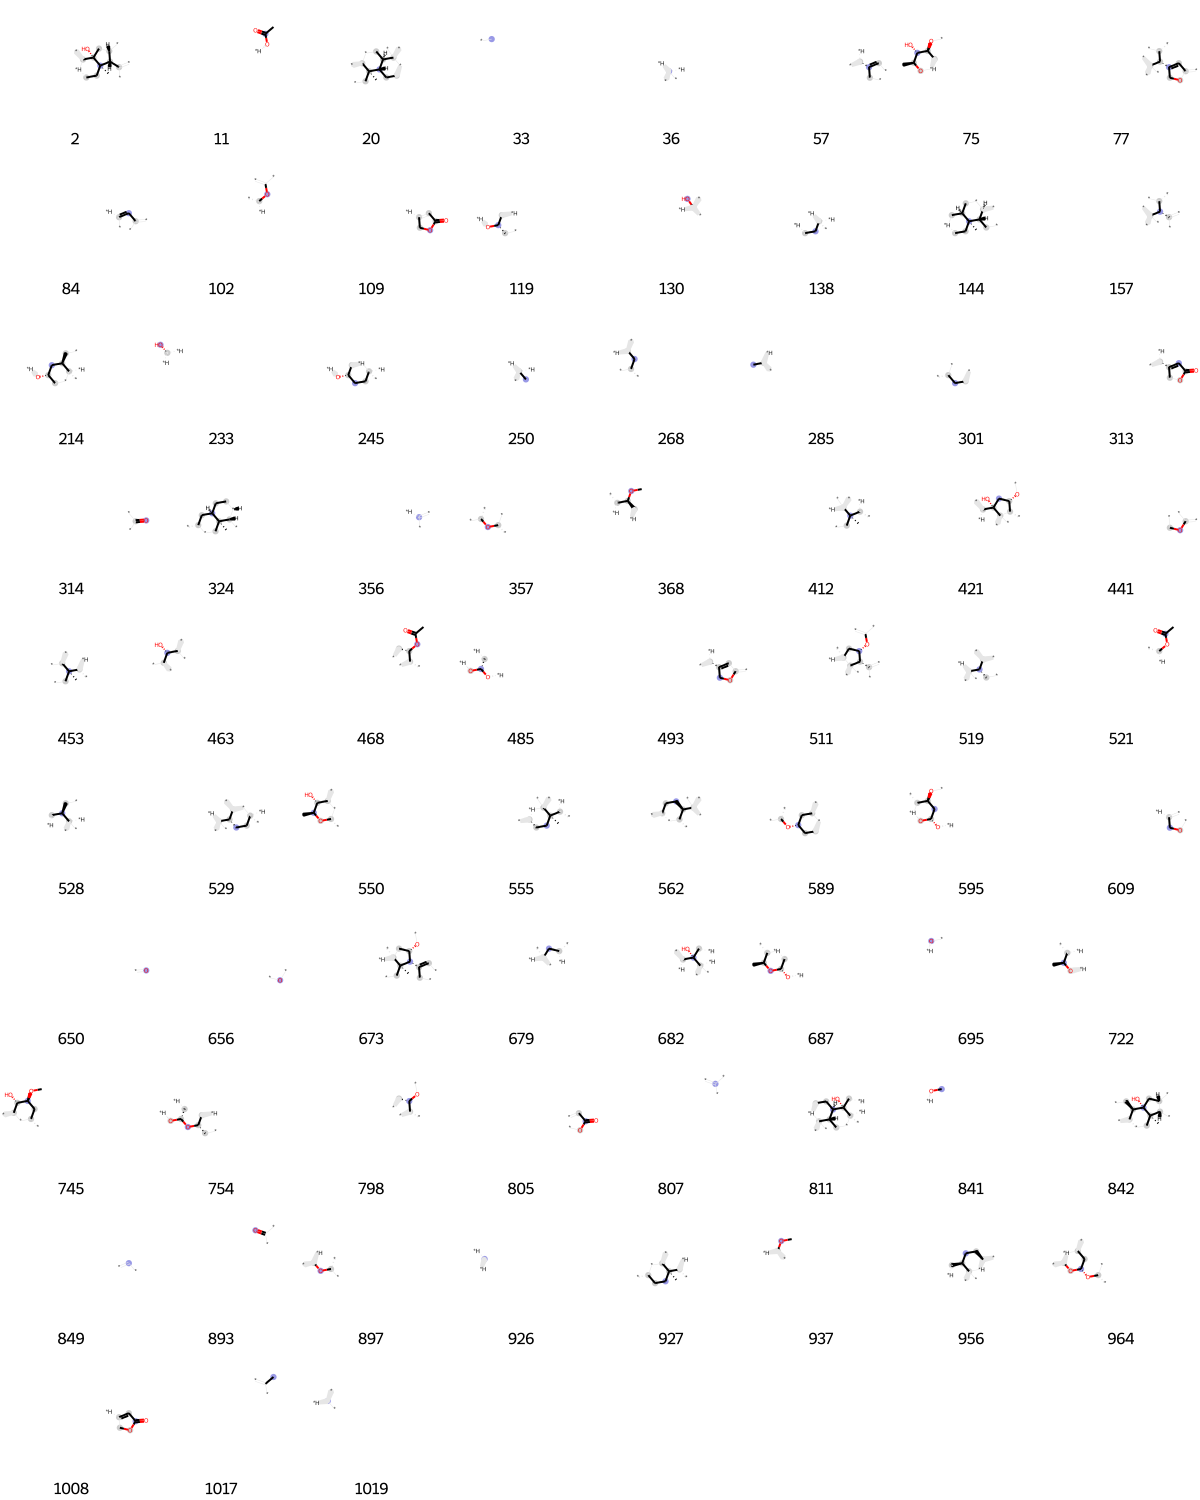

In [2048]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2049]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[23,
 51,
 90,
 112,
 146,
 168,
 211,
 213,
 291,
 301,
 305,
 308,
 314,
 326,
 333,
 338,
 356,
 358,
 360,
 378,
 389,
 407,
 416,
 431,
 433,
 453,
 456,
 464,
 470,
 483,
 519,
 525,
 546,
 577,
 599,
 624,
 650,
 656,
 674,
 699,
 705,
 739,
 790,
 795,
 802,
 807,
 812,
 816,
 825,
 844,
 848,
 849,
 875,
 886,
 893,
 894,
 904,
 926,
 935,
 950,
 967,
 1019]

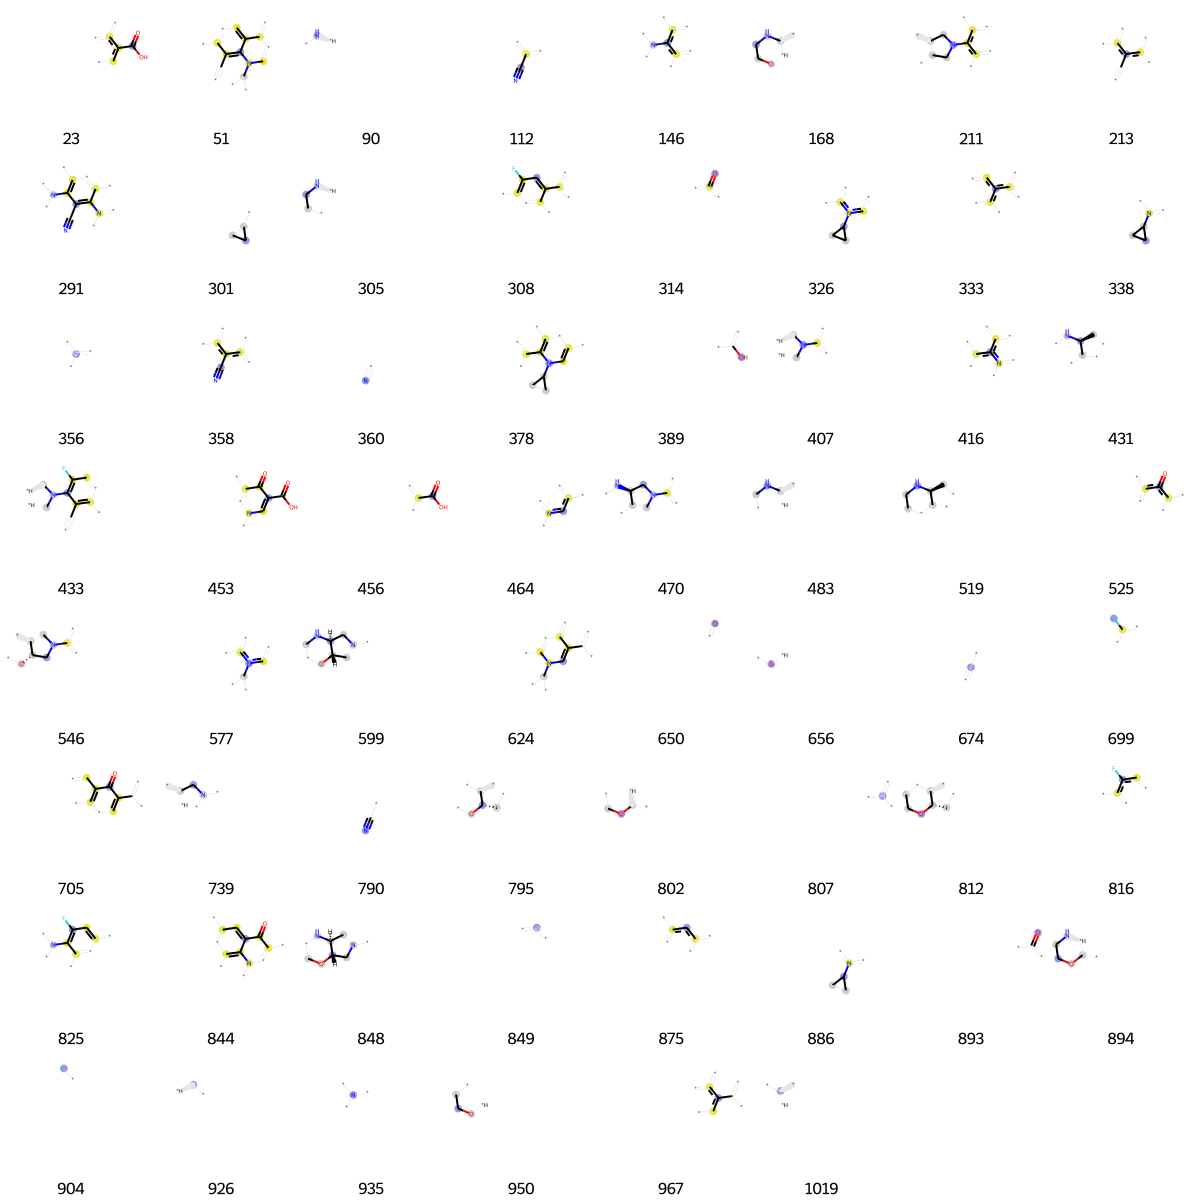

In [2050]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2051]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 51,
 80,
 84,
 88,
 122,
 129,
 138,
 155,
 182,
 188,
 195,
 222,
 233,
 242,
 250,
 262,
 294,
 301,
 314,
 333,
 356,
 362,
 408,
 412,
 450,
 465,
 470,
 479,
 504,
 507,
 519,
 529,
 540,
 588,
 622,
 640,
 650,
 679,
 695,
 714,
 718,
 769,
 773,
 794,
 807,
 841,
 849,
 860,
 893,
 897,
 914,
 926,
 973,
 990,
 1009,
 1019]

In [2052]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[19,
 53,
 64,
 112,
 114,
 122,
 128,
 130,
 191,
 203,
 262,
 269,
 309,
 319,
 336,
 350,
 356,
 378,
 407,
 419,
 426,
 428,
 429,
 448,
 452,
 456,
 486,
 546,
 573,
 589,
 606,
 623,
 650,
 714,
 715,
 726,
 757,
 767,
 786,
 792,
 807,
 809,
 842,
 843,
 849,
 873,
 893,
 904,
 915,
 926,
 935,
 952,
 954]

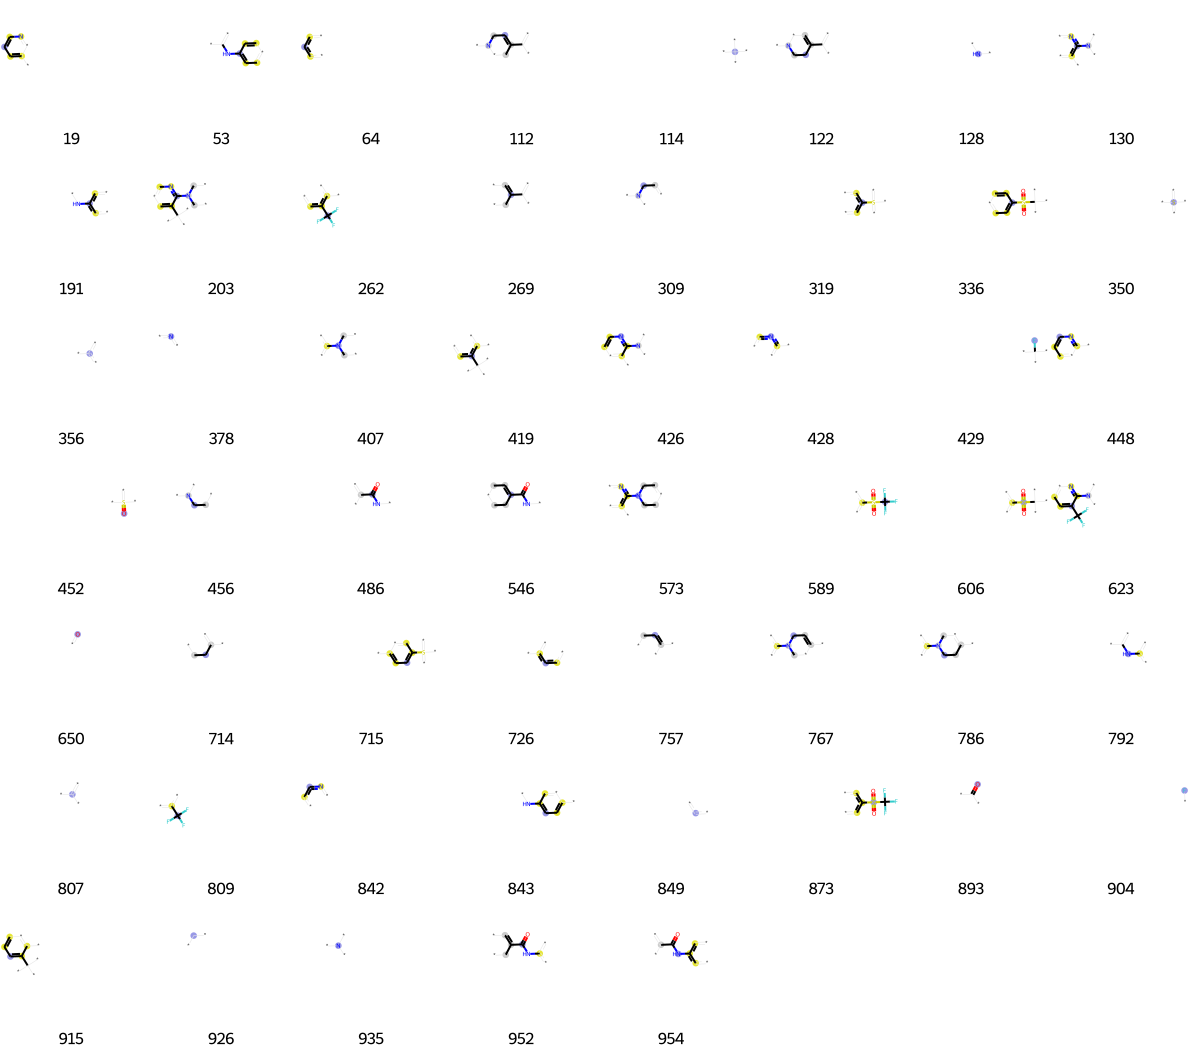

In [2053]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2054]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[1,
 33,
 121,
 142,
 235,
 237,
 283,
 356,
 448,
 578,
 583,
 598,
 698,
 726,
 799,
 805,
 807,
 849,
 851,
 875,
 1013]

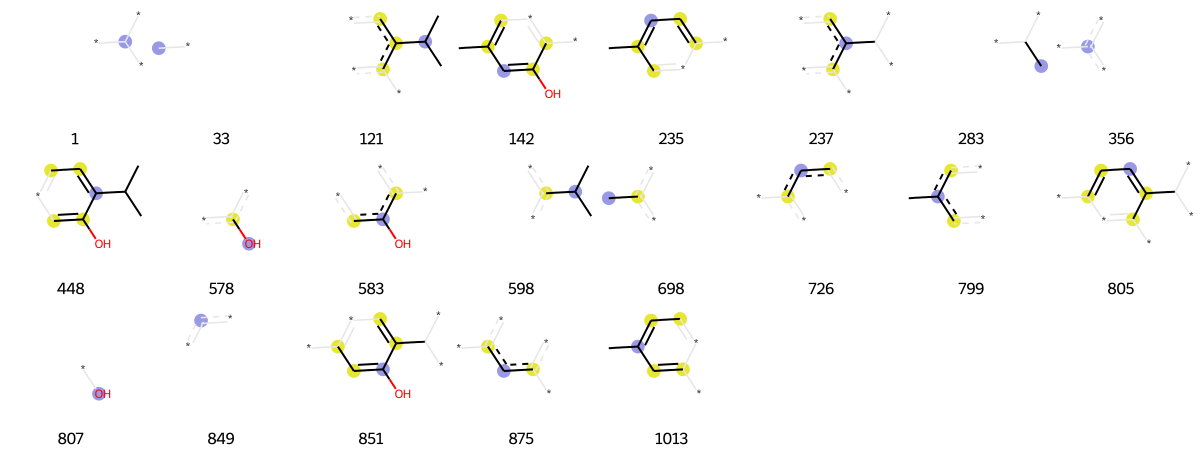

In [2055]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2056]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[25,
 31,
 67,
 157,
 205,
 284,
 289,
 315,
 356,
 366,
 381,
 451,
 578,
 583,
 589,
 643,
 650,
 694,
 711,
 726,
 745,
 793,
 807,
 835,
 849,
 875,
 893,
 925,
 967,
 1009,
 1017]

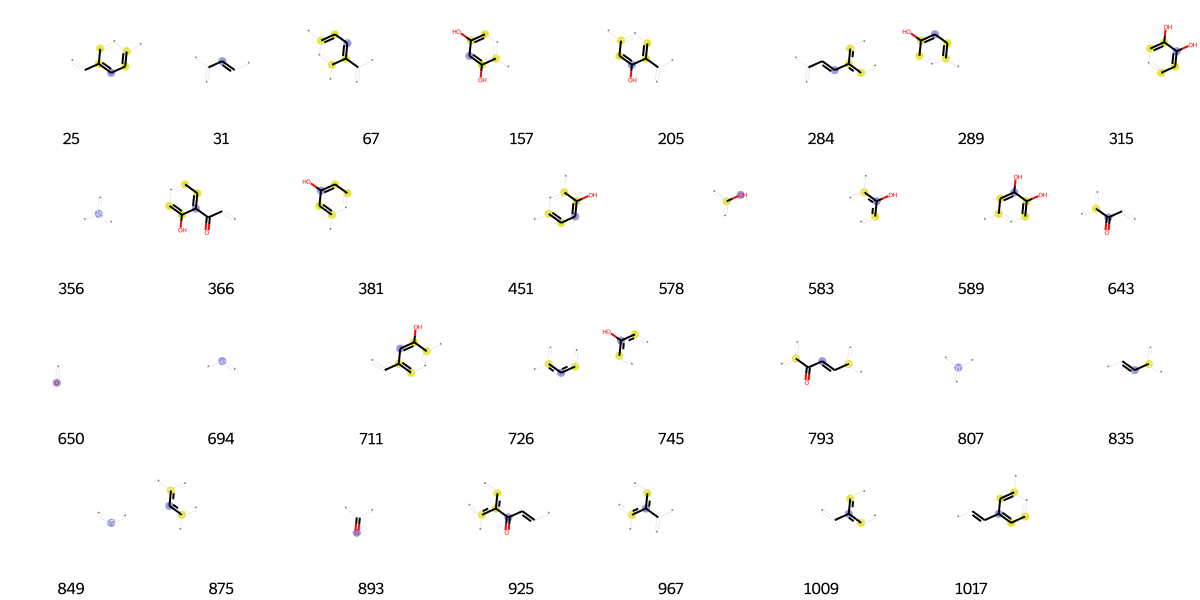

In [2057]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2058]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[9,
 13,
 21,
 33,
 64,
 80,
 104,
 172,
 173,
 175,
 219,
 251,
 294,
 328,
 333,
 356,
 361,
 368,
 428,
 460,
 473,
 500,
 514,
 515,
 549,
 555,
 580,
 582,
 586,
 591,
 620,
 650,
 656,
 661,
 695,
 726,
 784,
 786,
 794,
 807,
 815,
 849,
 875,
 878,
 881,
 887,
 893,
 927,
 932,
 947,
 957,
 975,
 984]

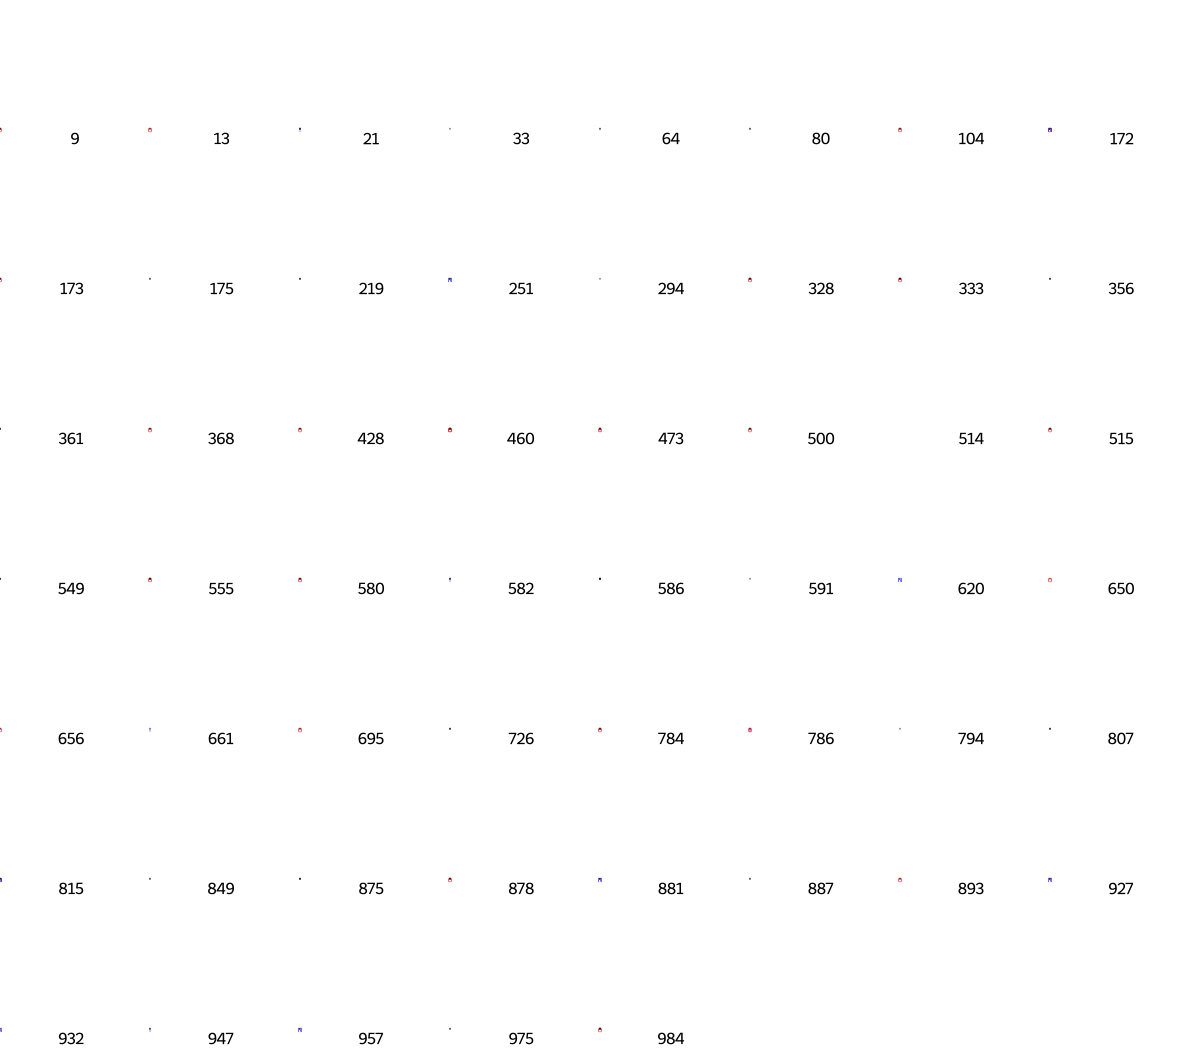

In [2059]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2060]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[33,
 86,
 89,
 188,
 209,
 249,
 294,
 301,
 311,
 342,
 356,
 512,
 521,
 531,
 570,
 624,
 695,
 698,
 713,
 714,
 734,
 799,
 807,
 835,
 841,
 849,
 875,
 918,
 926,
 929,
 946,
 955,
 1007,
 1017,
 1019,
 1022]

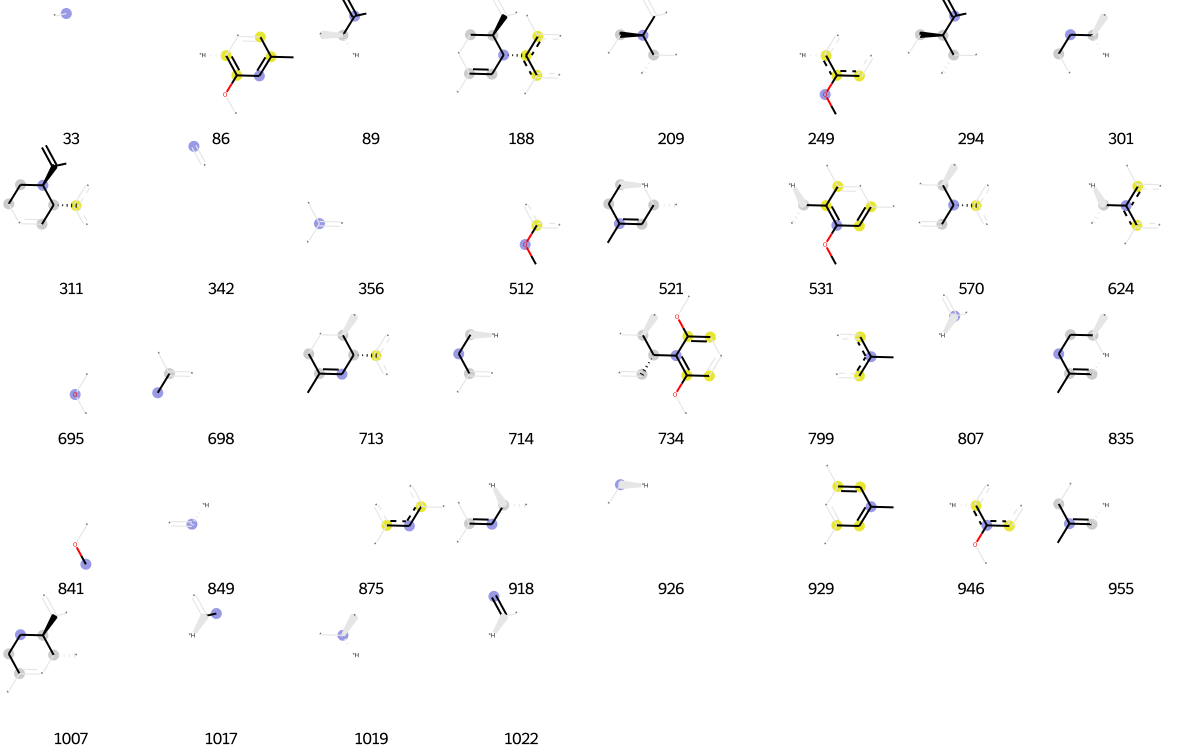

In [2061]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2062]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[9,
 119,
 128,
 147,
 182,
 216,
 240,
 301,
 356,
 378,
 407,
 409,
 433,
 558,
 565,
 568,
 610,
 831,
 926,
 1019]

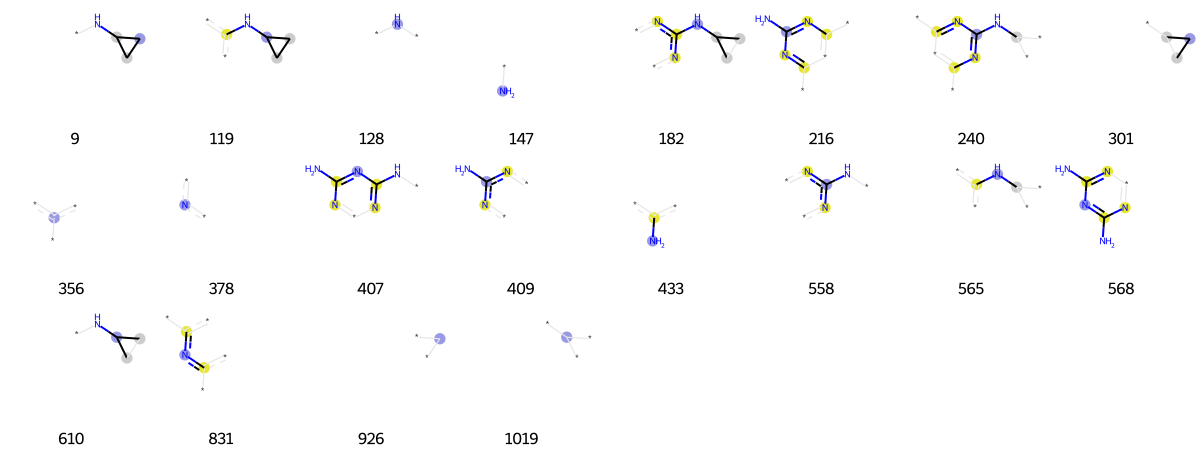

In [2063]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2064]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[5,
 14,
 15,
 33,
 36,
 42,
 55,
 64,
 80,
 90,
 128,
 139,
 140,
 147,
 175,
 184,
 191,
 241,
 261,
 309,
 314,
 352,
 356,
 361,
 380,
 389,
 395,
 410,
 476,
 487,
 507,
 527,
 603,
 633,
 650,
 652,
 673,
 680,
 699,
 703,
 726,
 728,
 730,
 740,
 792,
 807,
 849,
 875,
 881,
 893,
 958,
 961]

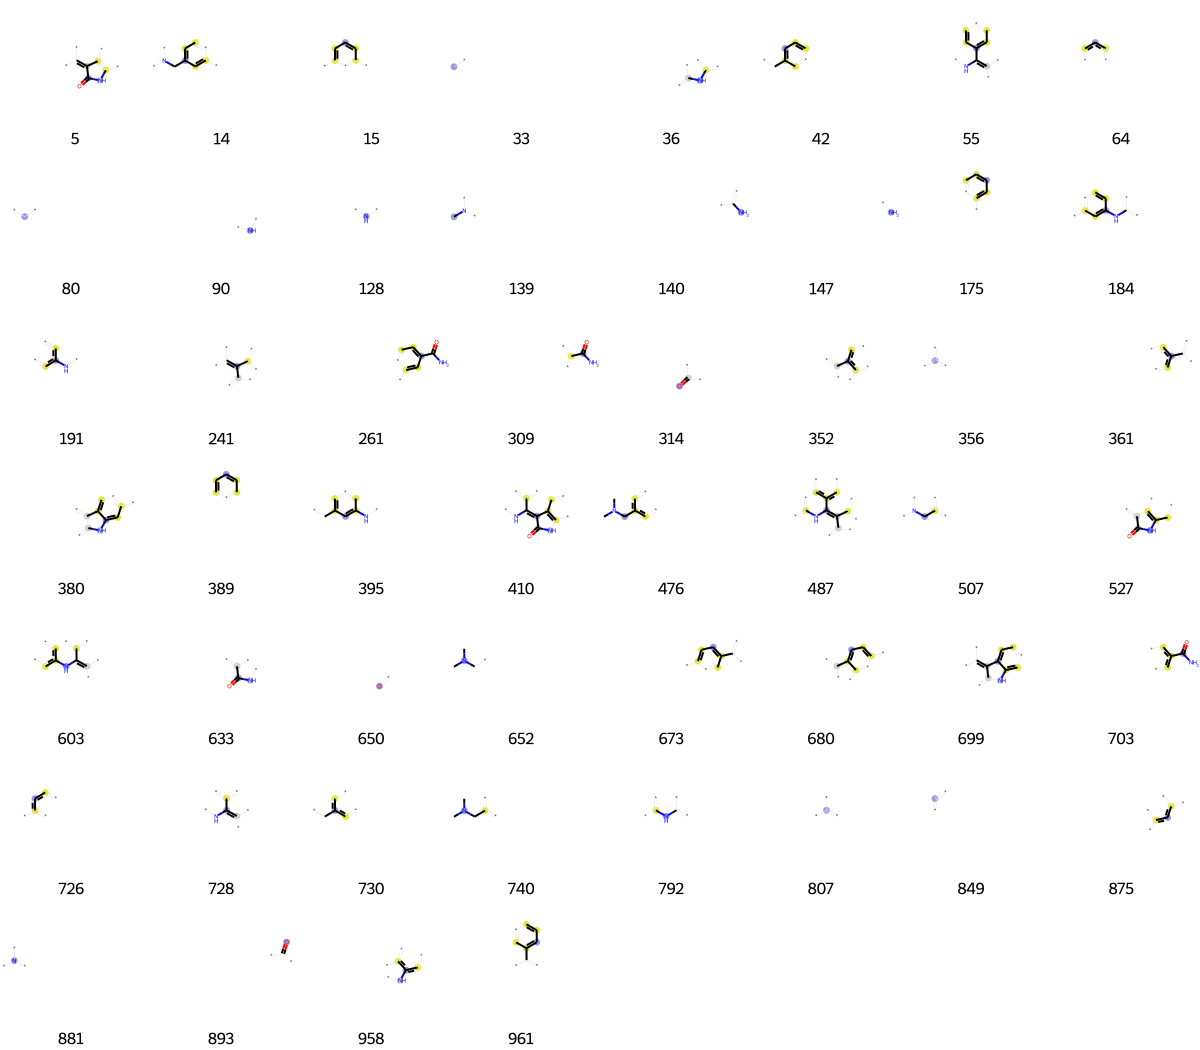

In [2065]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2066]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[7,
 13,
 16,
 33,
 36,
 61,
 80,
 119,
 121,
 138,
 168,
 172,
 231,
 239,
 245,
 250,
 251,
 294,
 301,
 302,
 314,
 356,
 367,
 377,
 421,
 504,
 519,
 529,
 598,
 620,
 622,
 650,
 694,
 695,
 696,
 714,
 757,
 758,
 767,
 823,
 831,
 849,
 860,
 881,
 926,
 927,
 932,
 957,
 1019]

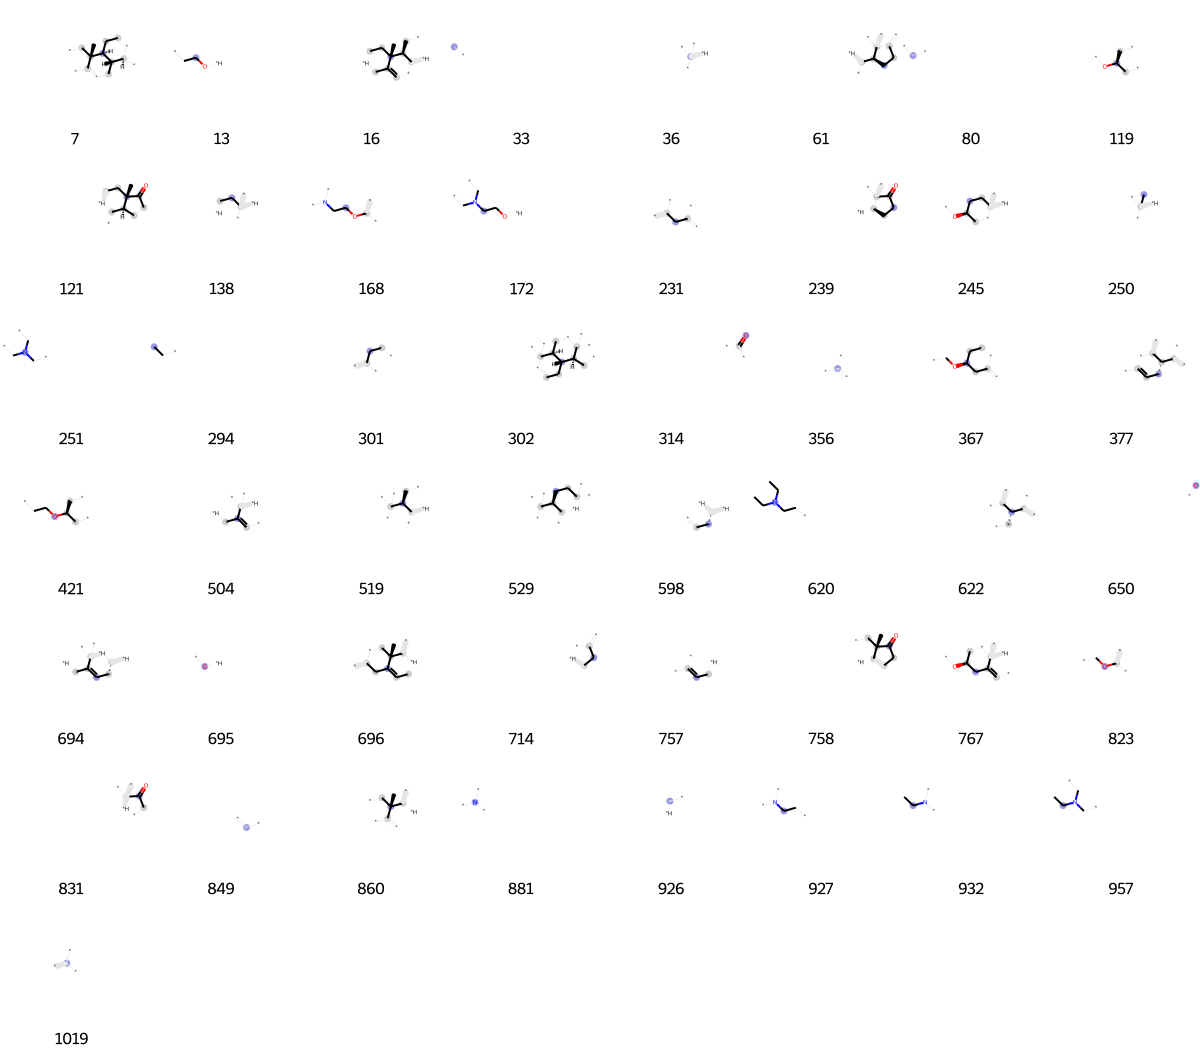

In [2067]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2068]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[19,
 33,
 36,
 64,
 66,
 71,
 73,
 80,
 83,
 90,
 105,
 120,
 121,
 128,
 138,
 150,
 190,
 197,
 206,
 250,
 255,
 278,
 279,
 289,
 301,
 314,
 332,
 335,
 344,
 356,
 375,
 378,
 423,
 428,
 429,
 448,
 453,
 519,
 522,
 529,
 562,
 622,
 627,
 644,
 650,
 668,
 689,
 699,
 716,
 721,
 726,
 736,
 740,
 749,
 802,
 807,
 808,
 831,
 842,
 849,
 878,
 879,
 893,
 904,
 926,
 927,
 935,
 951,
 1004,
 1019]

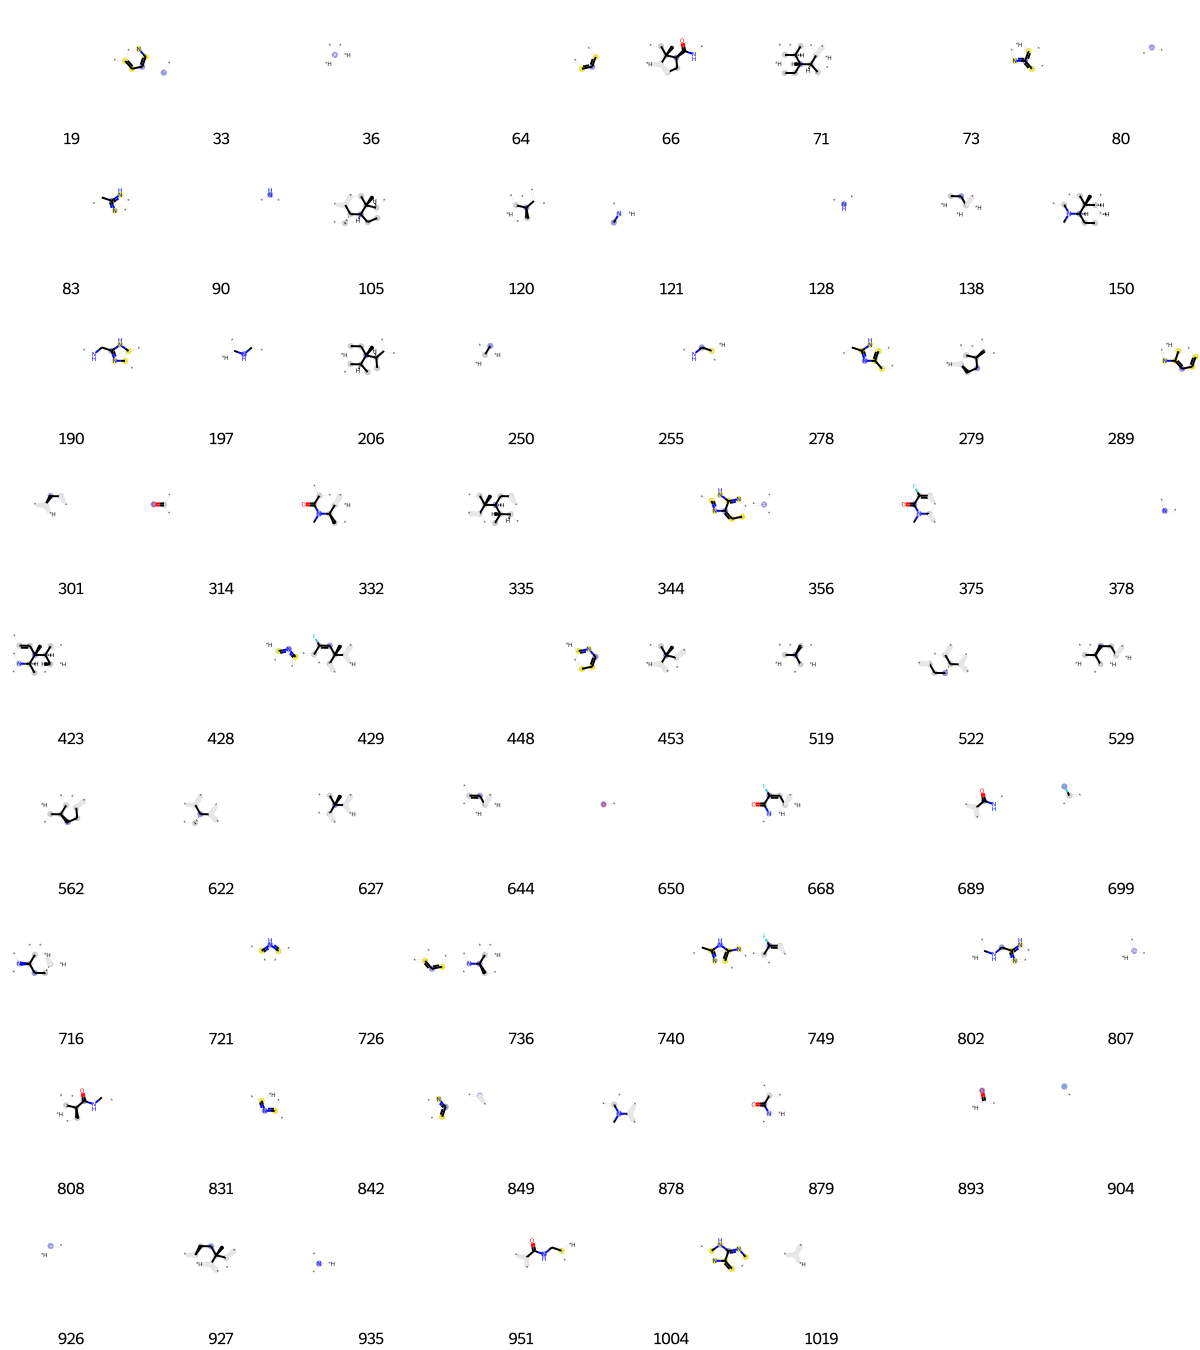

In [2069]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2070]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[1,
 33,
 64,
 80,
 108,
 128,
 147,
 175,
 197,
 212,
 221,
 231,
 271,
 294,
 350,
 356,
 369,
 474,
 520,
 531,
 567,
 590,
 591,
 623,
 650,
 664,
 666,
 667,
 684,
 689,
 726,
 786,
 794,
 807,
 815,
 825,
 849,
 852,
 870,
 887,
 893,
 895,
 926,
 935,
 961,
 1019]

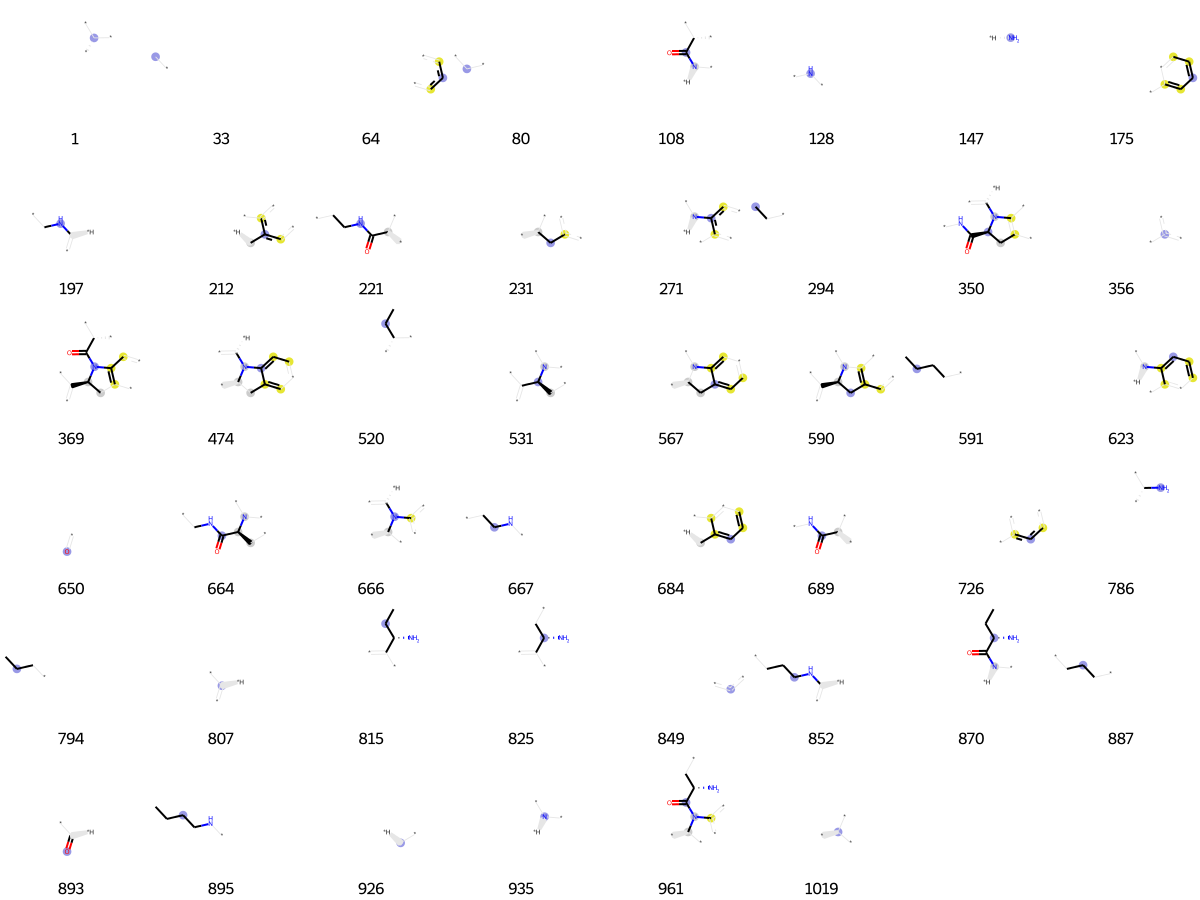

In [2071]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2072]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 33,
 42,
 63,
 64,
 80,
 123,
 175,
 203,
 204,
 283,
 322,
 356,
 361,
 389,
 427,
 452,
 507,
 540,
 546,
 598,
 650,
 669,
 673,
 679,
 702,
 726,
 730,
 775,
 807,
 829,
 831,
 845,
 849,
 875,
 881,
 893,
 926,
 927]

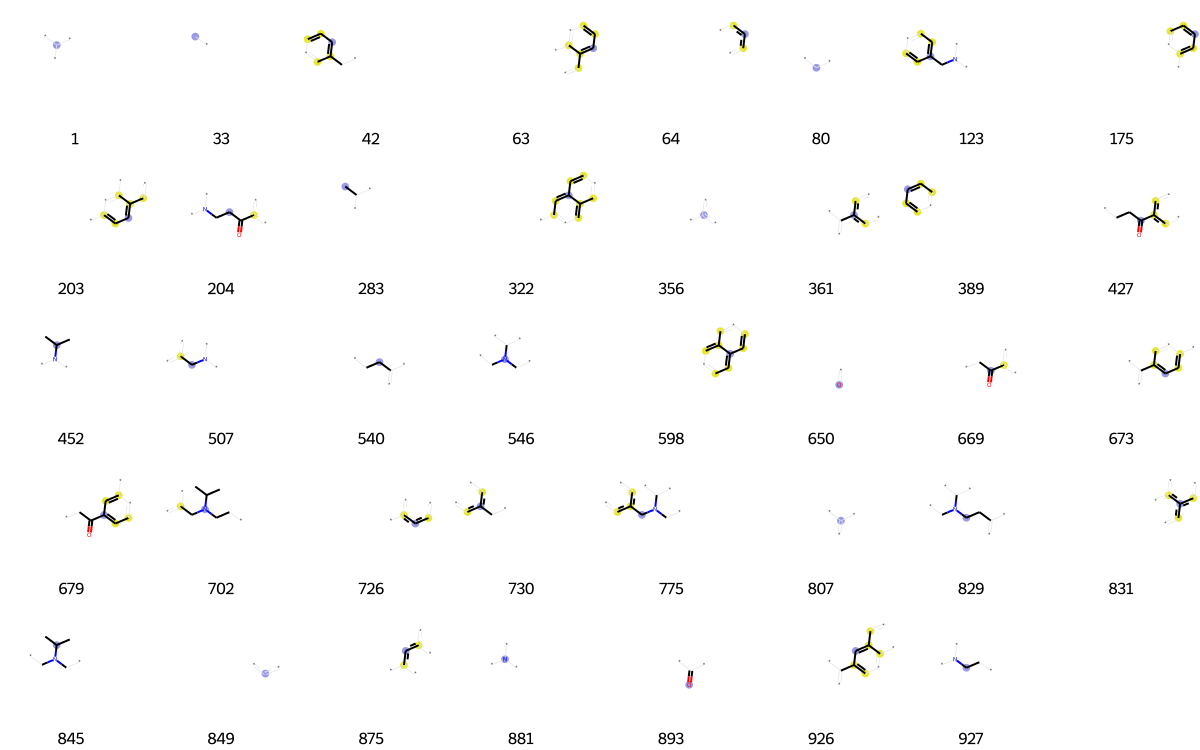

In [2073]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2074]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[12,
 19,
 36,
 64,
 75,
 80,
 87,
 90,
 113,
 114,
 128,
 236,
 255,
 268,
 310,
 325,
 333,
 356,
 364,
 372,
 378,
 383,
 392,
 393,
 406,
 428,
 429,
 448,
 511,
 549,
 562,
 638,
 641,
 726,
 730,
 806,
 809,
 842,
 849,
 855,
 856,
 885,
 897,
 904,
 967,
 975,
 980]

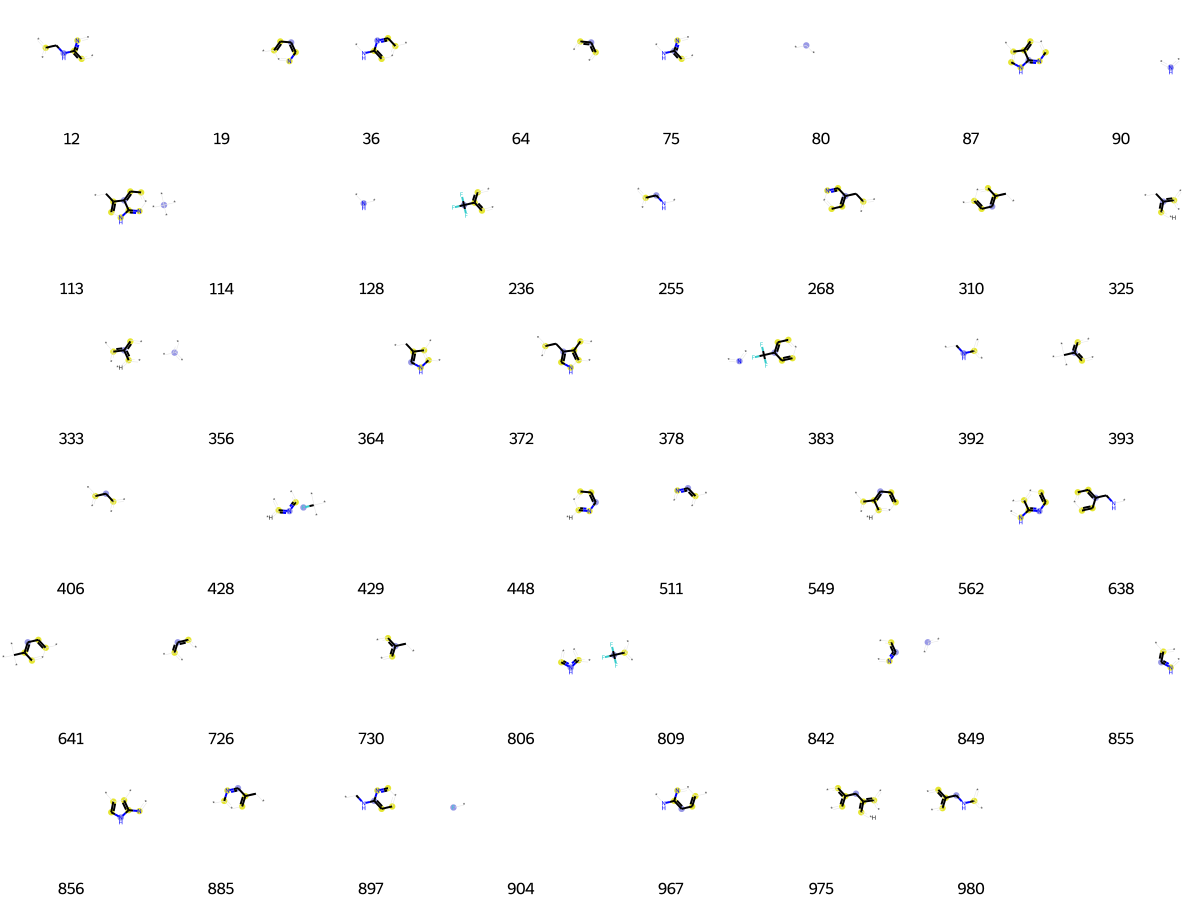

In [2075]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2076]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1, 80, 222, 227, 482, 807, 831, 845, 888]

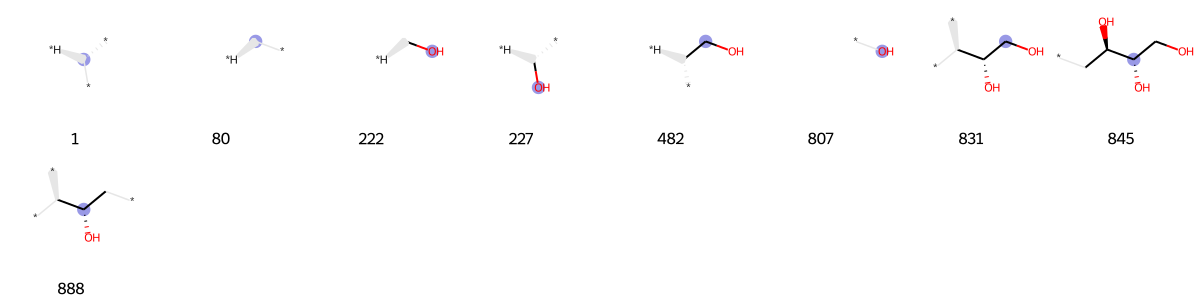

In [2077]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2078]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[14,
 25,
 31,
 36,
 49,
 102,
 109,
 130,
 173,
 176,
 184,
 226,
 233,
 284,
 308,
 315,
 356,
 389,
 451,
 463,
 575,
 578,
 583,
 589,
 604,
 650,
 679,
 694,
 695,
 711,
 726,
 770,
 781,
 798,
 807,
 835,
 849,
 873,
 875,
 893,
 926,
 1009,
 1017,
 1019]

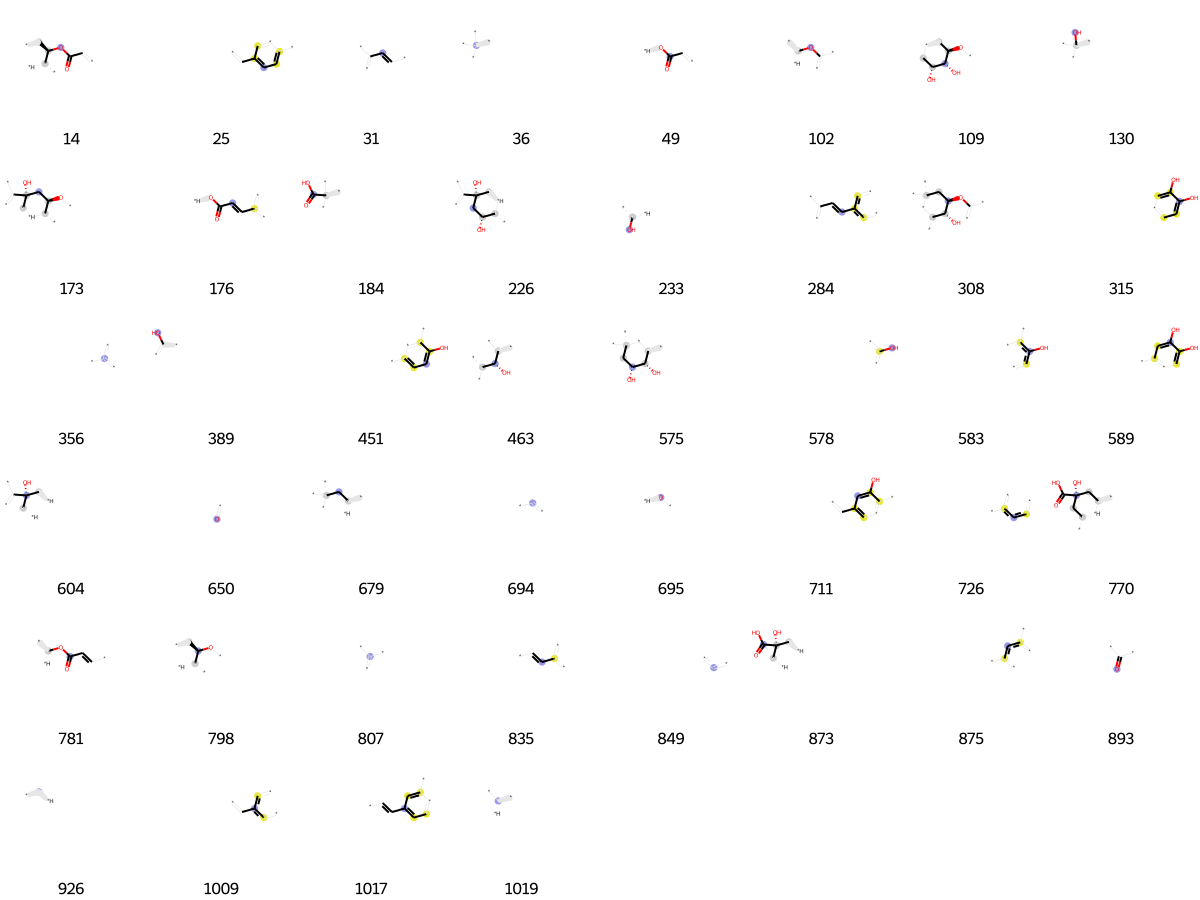

In [2079]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2080]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 31,
 33,
 36,
 55,
 92,
 138,
 144,
 173,
 250,
 259,
 264,
 295,
 325,
 356,
 390,
 432,
 444,
 500,
 552,
 602,
 618,
 642,
 650,
 694,
 698,
 714,
 718,
 803,
 807,
 835,
 926,
 932,
 933,
 953,
 1004,
 1017]

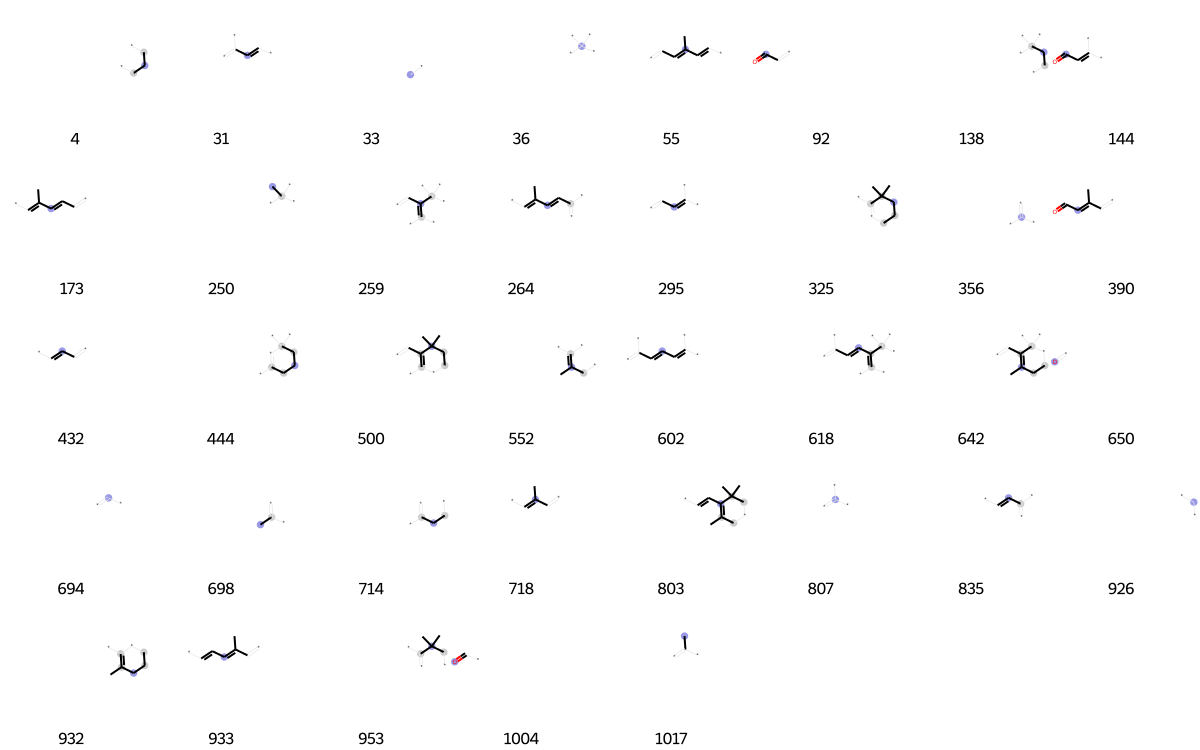

In [2081]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2082]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[19,
 33,
 64,
 65,
 80,
 83,
 128,
 212,
 329,
 332,
 356,
 378,
 400,
 401,
 406,
 437,
 511,
 533,
 562,
 579,
 667,
 676,
 694,
 718,
 726,
 835,
 842,
 849,
 971,
 1009]

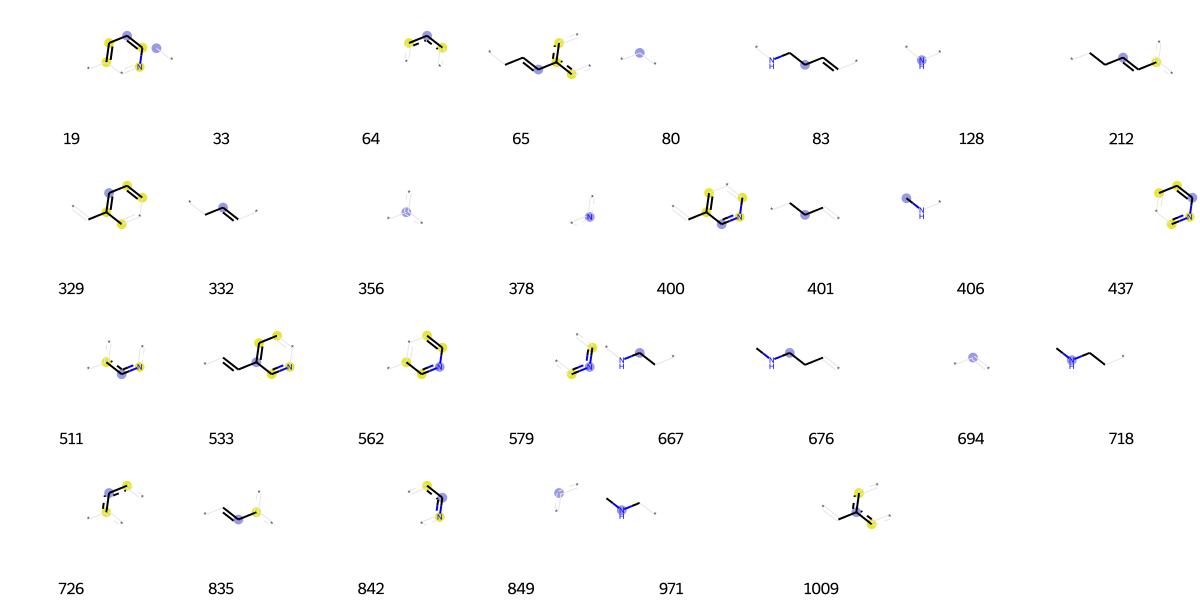

In [2083]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2084]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[2,
 4,
 33,
 45,
 73,
 128,
 144,
 147,
 162,
 184,
 252,
 301,
 356,
 357,
 372,
 378,
 387,
 428,
 433,
 486,
 514,
 521,
 531,
 548,
 586,
 592,
 610,
 631,
 647,
 650,
 667,
 675,
 698,
 721,
 726,
 742,
 781,
 807,
 831,
 849,
 875,
 888,
 890,
 892,
 893,
 926,
 935,
 961,
 1019]

In [2085]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[32,
 64,
 73,
 121,
 129,
 147,
 165,
 204,
 209,
 211,
 216,
 230,
 333,
 356,
 361,
 378,
 389,
 412,
 424,
 433,
 474,
 506,
 561,
 629,
 656,
 659,
 672,
 726,
 753,
 781,
 787,
 816,
 831,
 849,
 875,
 891,
 902,
 932,
 935,
 961,
 964]

In [2086]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 64,
 71,
 75,
 80,
 128,
 147,
 152,
 175,
 191,
 194,
 210,
 222,
 233,
 356,
 378,
 389,
 428,
 433,
 435,
 454,
 463,
 491,
 492,
 500,
 519,
 558,
 562,
 577,
 610,
 656,
 672,
 677,
 700,
 703,
 726,
 740,
 807,
 820,
 825,
 831,
 849,
 886,
 897,
 910,
 932,
 935,
 1019]

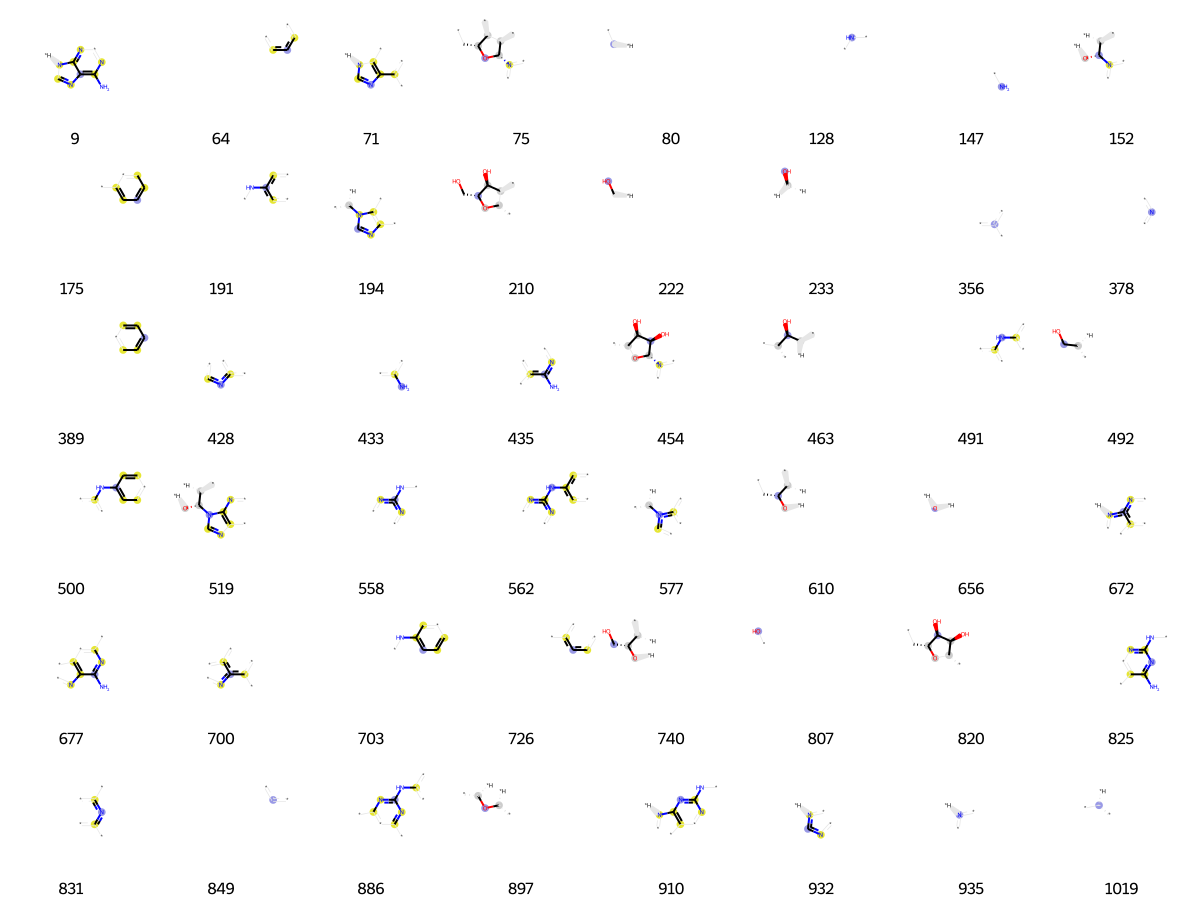

In [2087]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2088]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[15,
 33,
 64,
 74,
 75,
 80,
 102,
 107,
 121,
 128,
 151,
 162,
 193,
 205,
 208,
 221,
 222,
 312,
 356,
 360,
 366,
 367,
 378,
 381,
 383,
 385,
 407,
 419,
 428,
 456,
 458,
 461,
 473,
 484,
 486,
 491,
 511,
 527,
 541,
 561,
 569,
 580,
 650,
 659,
 675,
 698,
 702,
 722,
 726,
 758,
 767,
 792,
 798,
 807,
 831,
 849,
 875,
 885,
 893,
 926,
 935,
 971,
 974,
 975]

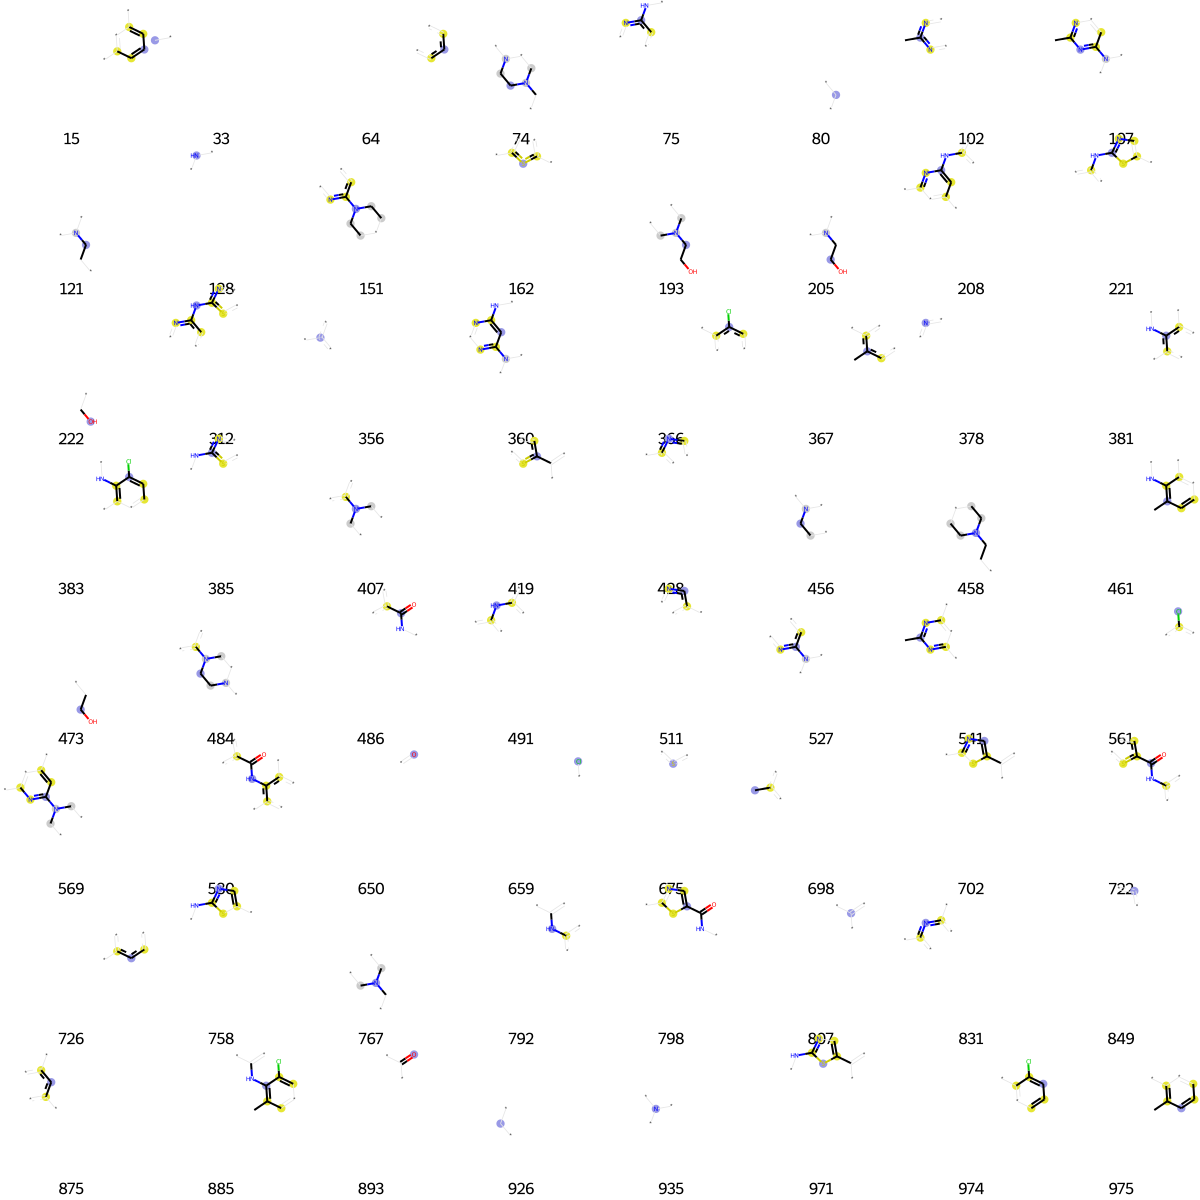

In [2089]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [2090]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 41,
 64,
 80,
 97,
 110,
 128,
 139,
 175,
 193,
 233,
 296,
 356,
 361,
 389,
 468,
 556,
 650,
 726,
 737,
 807,
 849,
 881,
 893,
 902,
 953,
 961,
 966]

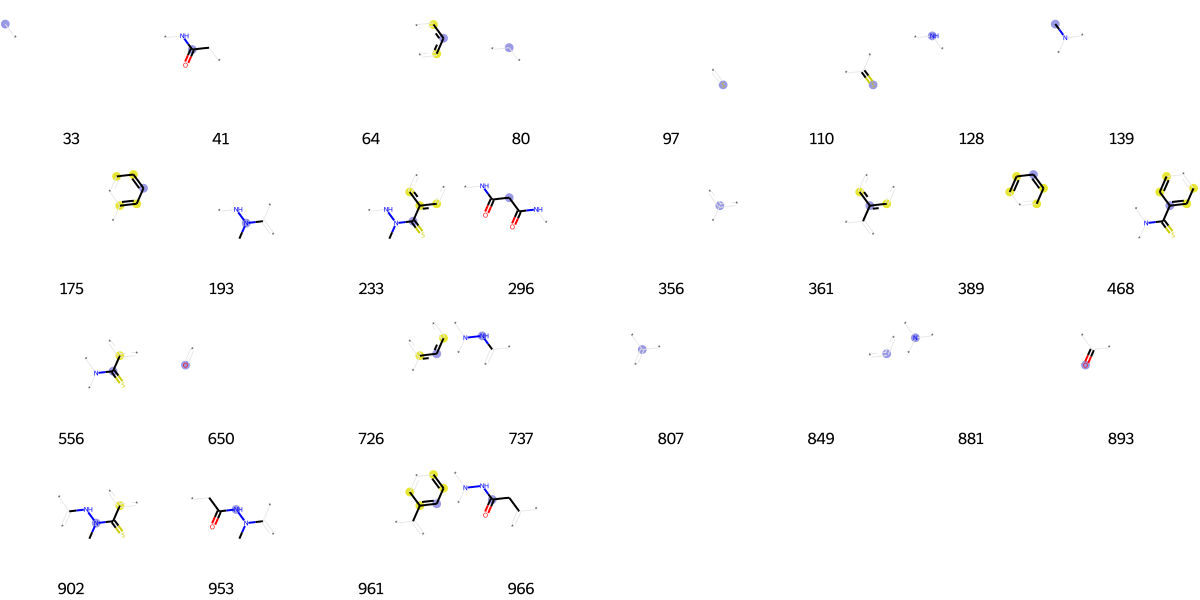

In [2091]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2092]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[8,
 64,
 80,
 128,
 175,
 197,
 201,
 263,
 265,
 356,
 361,
 363,
 389,
 486,
 540,
 641,
 650,
 667,
 713,
 726,
 807,
 849,
 893,
 961]

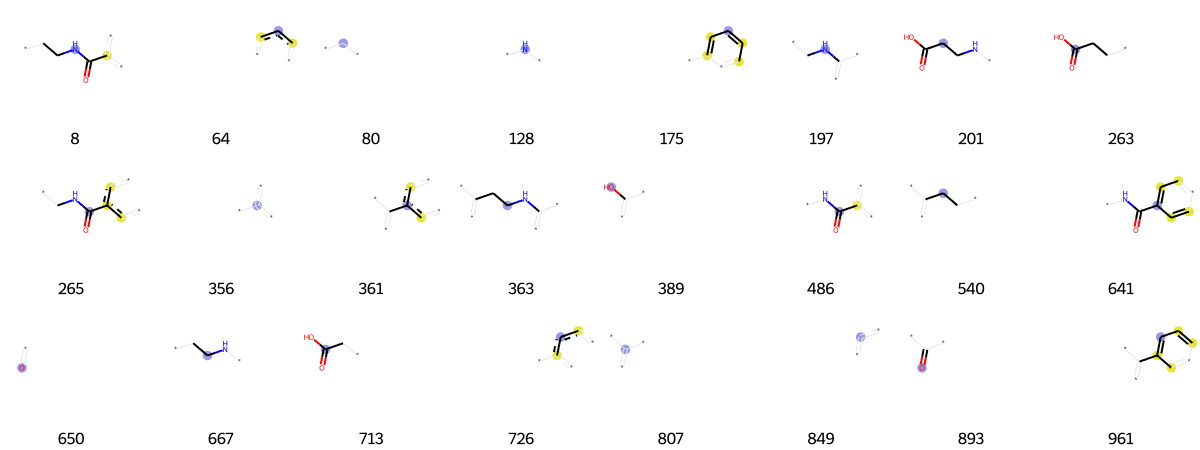

In [2093]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2094]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[26,
 33,
 39,
 73,
 119,
 128,
 133,
 200,
 202,
 218,
 221,
 233,
 245,
 249,
 301,
 333,
 342,
 343,
 356,
 366,
 378,
 421,
 428,
 456,
 489,
 491,
 512,
 524,
 544,
 561,
 565,
 621,
 624,
 637,
 650,
 652,
 659,
 666,
 673,
 688,
 694,
 695,
 699,
 708,
 726,
 780,
 786,
 794,
 807,
 832,
 841,
 849,
 875,
 881,
 888,
 893,
 904,
 926,
 935,
 946,
 954,
 959,
 985,
 1011,
 1019]

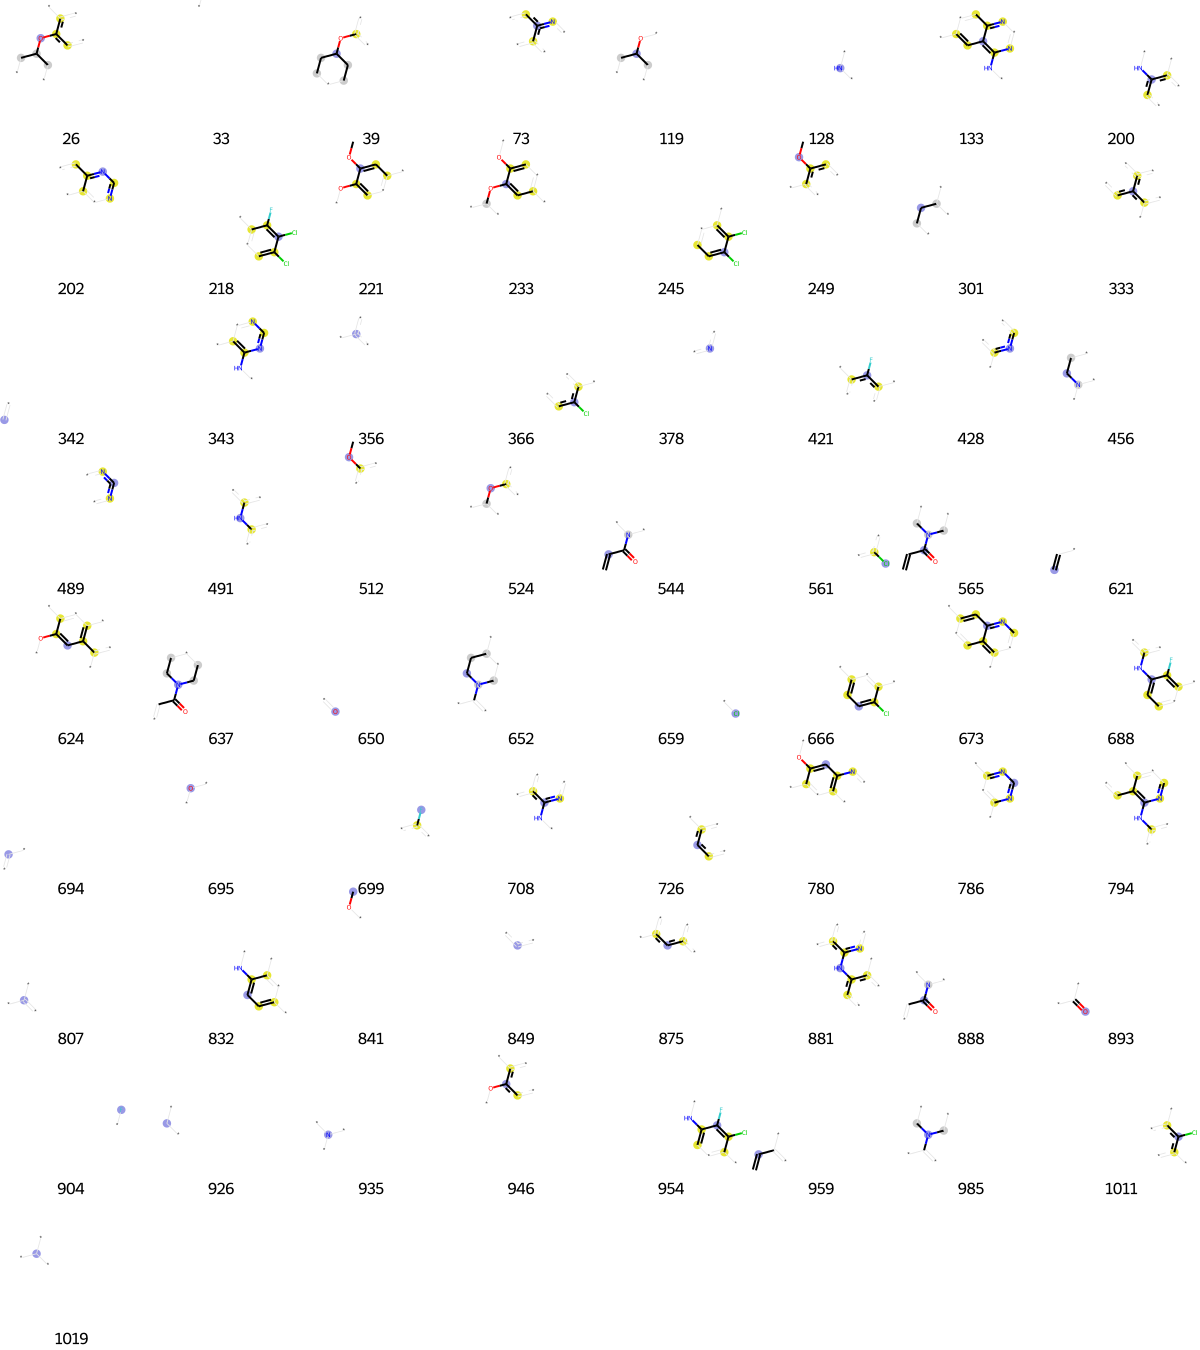

In [2095]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2096]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[33, 80, 89, 215, 222, 379, 414, 463, 473, 478, 628, 695, 807, 831, 904, 913]

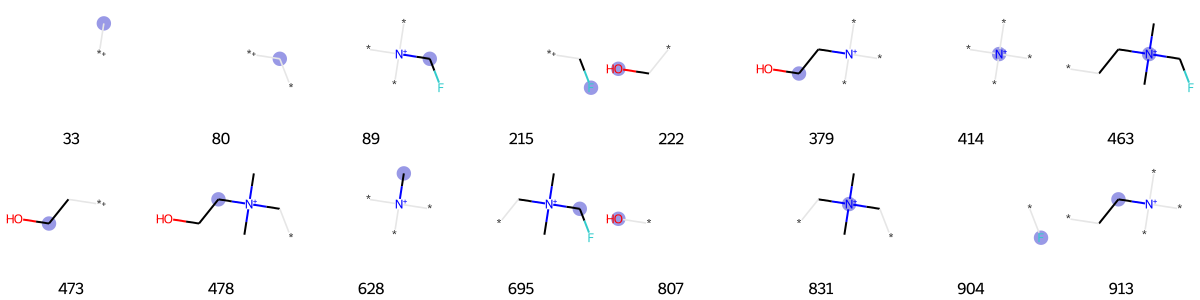

In [2097]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2098]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[33,
 34,
 64,
 74,
 80,
 84,
 128,
 155,
 175,
 191,
 200,
 272,
 284,
 294,
 310,
 319,
 325,
 342,
 356,
 361,
 366,
 378,
 428,
 456,
 458,
 486,
 491,
 500,
 507,
 511,
 544,
 558,
 561,
 562,
 565,
 641,
 650,
 659,
 672,
 673,
 699,
 708,
 726,
 730,
 760,
 767,
 771,
 791,
 792,
 807,
 816,
 831,
 843,
 849,
 858,
 865,
 888,
 893,
 904,
 913,
 926,
 935,
 947,
 974,
 985,
 1009]

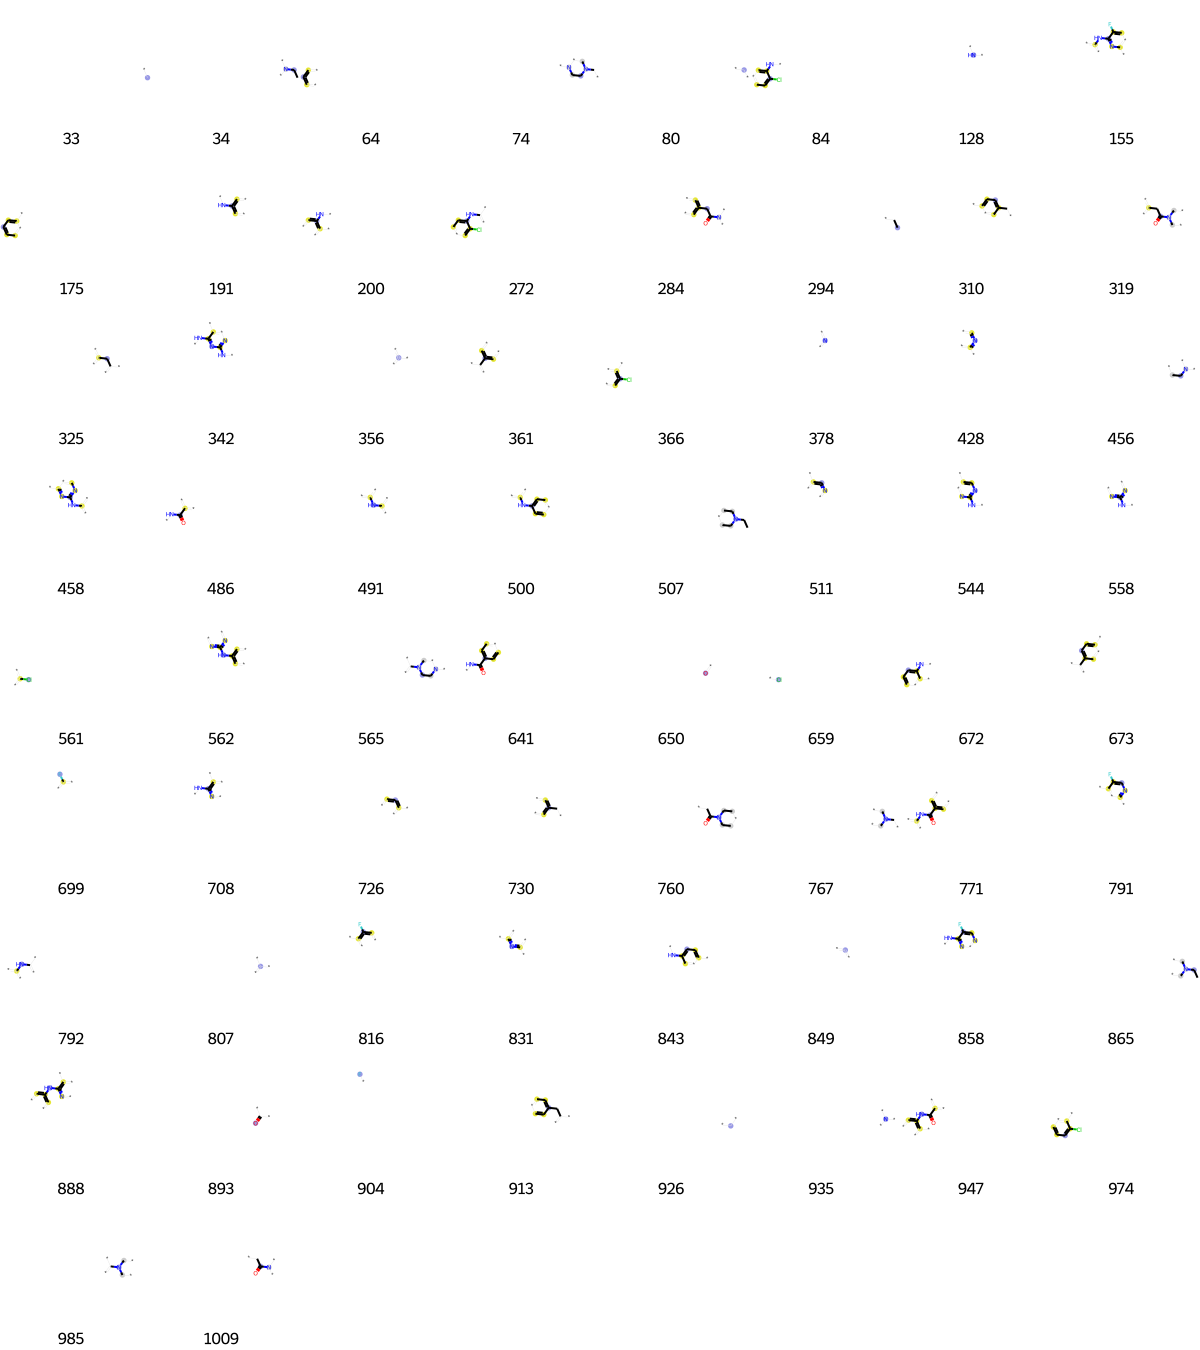

In [2099]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2100]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[33,
 64,
 80,
 119,
 157,
 167,
 294,
 328,
 389,
 418,
 420,
 463,
 591,
 663,
 727,
 790,
 794,
 813,
 842,
 849,
 887,
 1003]

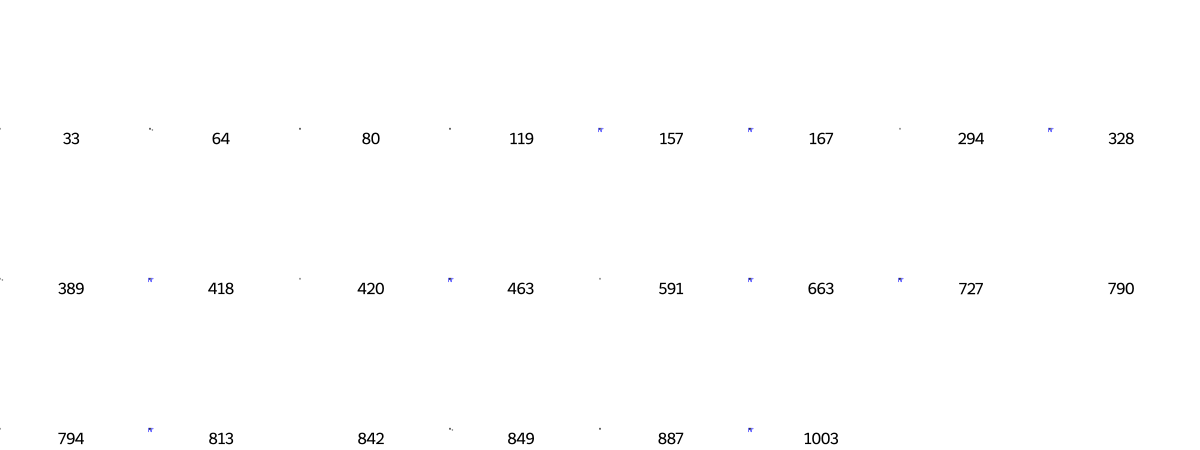

In [2101]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2102]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[14,
 15,
 33,
 61,
 64,
 80,
 105,
 117,
 121,
 128,
 207,
 212,
 246,
 252,
 254,
 319,
 325,
 337,
 350,
 356,
 364,
 366,
 378,
 385,
 392,
 452,
 456,
 480,
 502,
 503,
 543,
 552,
 561,
 565,
 650,
 658,
 659,
 675,
 698,
 724,
 726,
 734,
 760,
 798,
 807,
 831,
 849,
 893,
 926,
 935,
 974,
 985,
 992,
 1009]

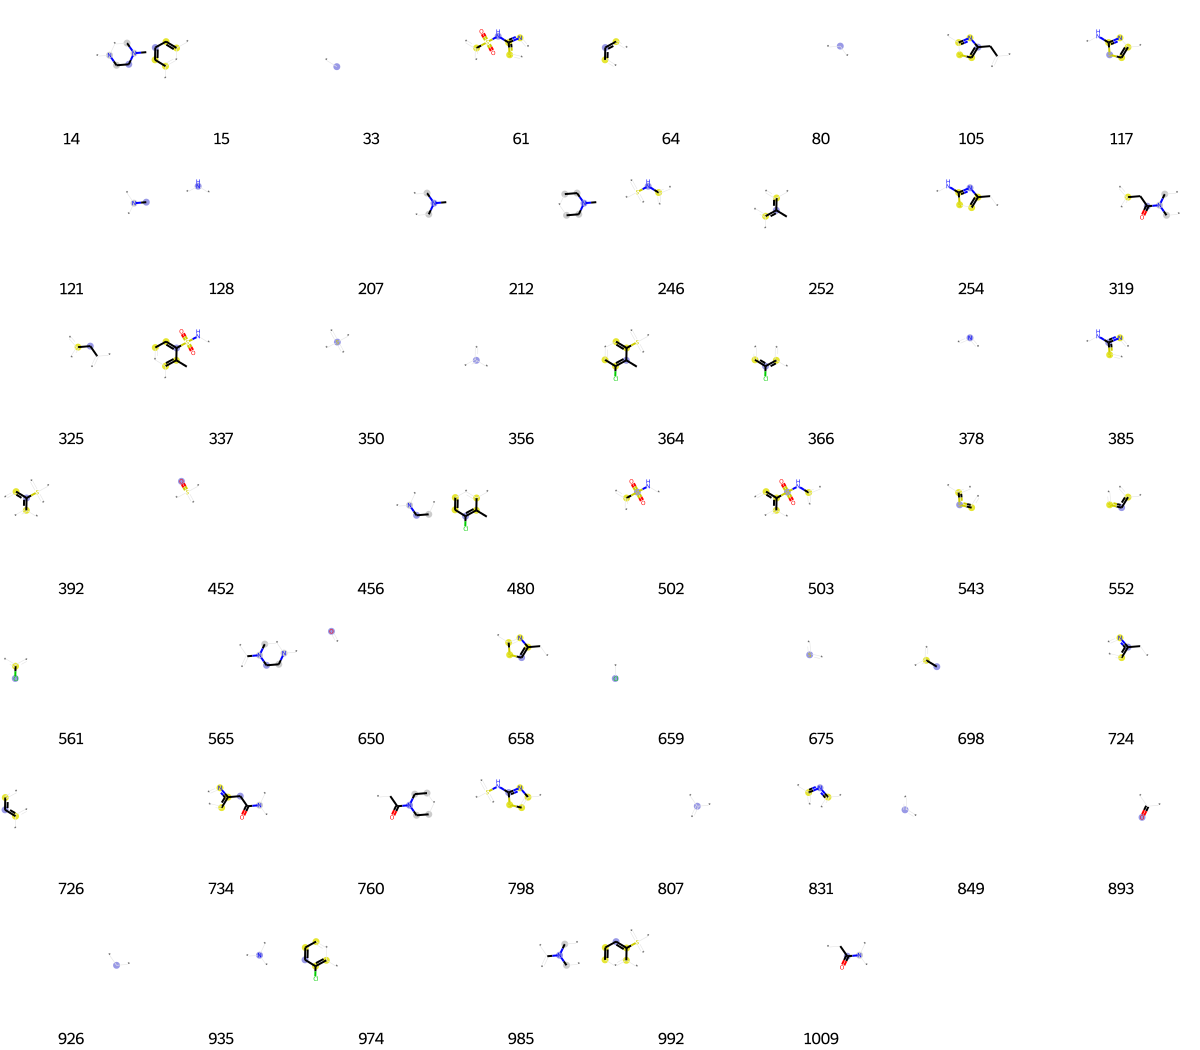

In [2103]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2104]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[25,
 31,
 33,
 64,
 80,
 90,
 99,
 119,
 125,
 128,
 145,
 157,
 175,
 219,
 233,
 255,
 275,
 284,
 310,
 327,
 333,
 356,
 452,
 464,
 523,
 549,
 607,
 638,
 650,
 667,
 692,
 694,
 698,
 721,
 726,
 730,
 759,
 807,
 835,
 837,
 849,
 878,
 893,
 936,
 966,
 1004,
 1009,
 1010]

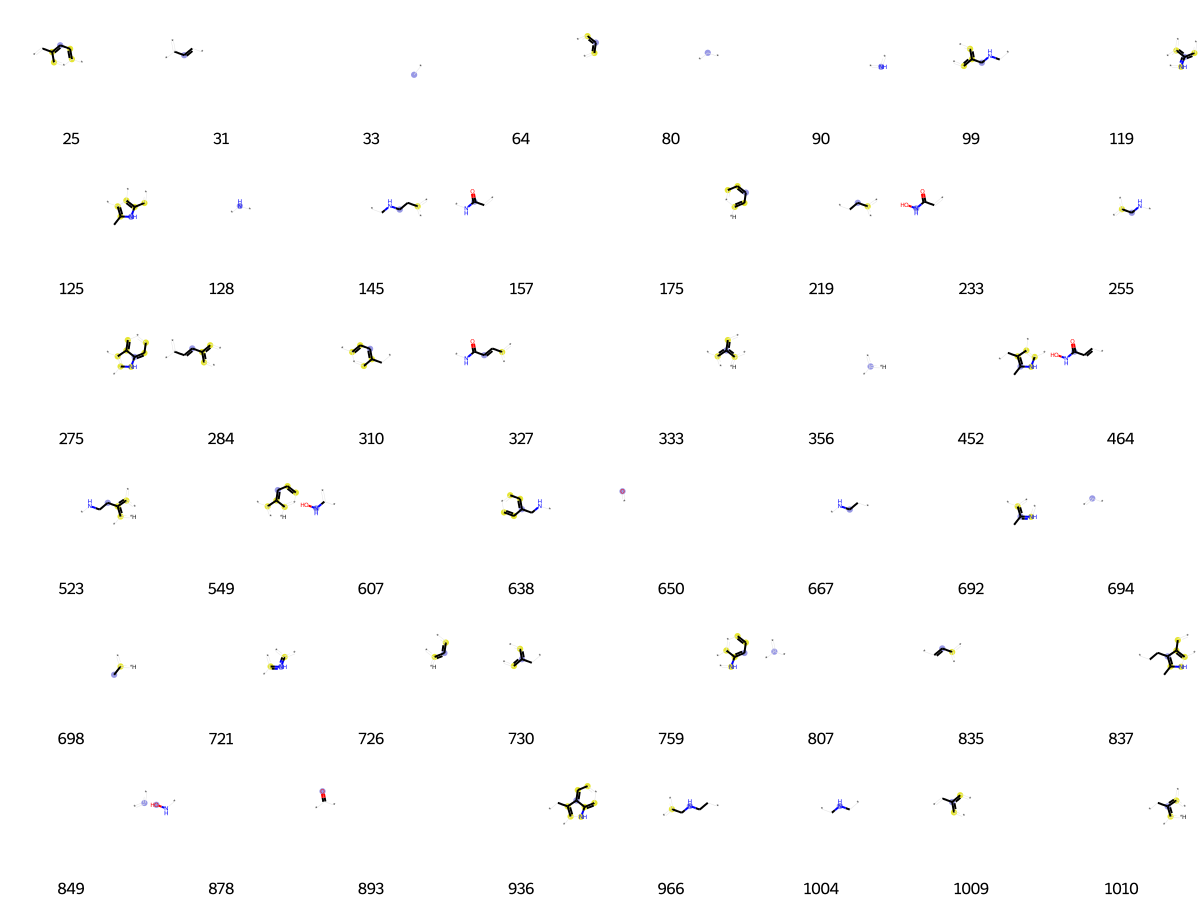

In [2105]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2106]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[15,
 33,
 41,
 53,
 64,
 80,
 90,
 119,
 128,
 139,
 173,
 175,
 184,
 191,
 251,
 323,
 328,
 329,
 333,
 352,
 356,
 358,
 361,
 366,
 378,
 428,
 439,
 453,
 458,
 486,
 491,
 511,
 540,
 544,
 546,
 549,
 558,
 561,
 562,
 600,
 608,
 641,
 650,
 652,
 659,
 673,
 693,
 694,
 703,
 721,
 726,
 759,
 771,
 792,
 806,
 807,
 831,
 843,
 849,
 855,
 875,
 881,
 887,
 893,
 901,
 913,
 927,
 946,
 954]

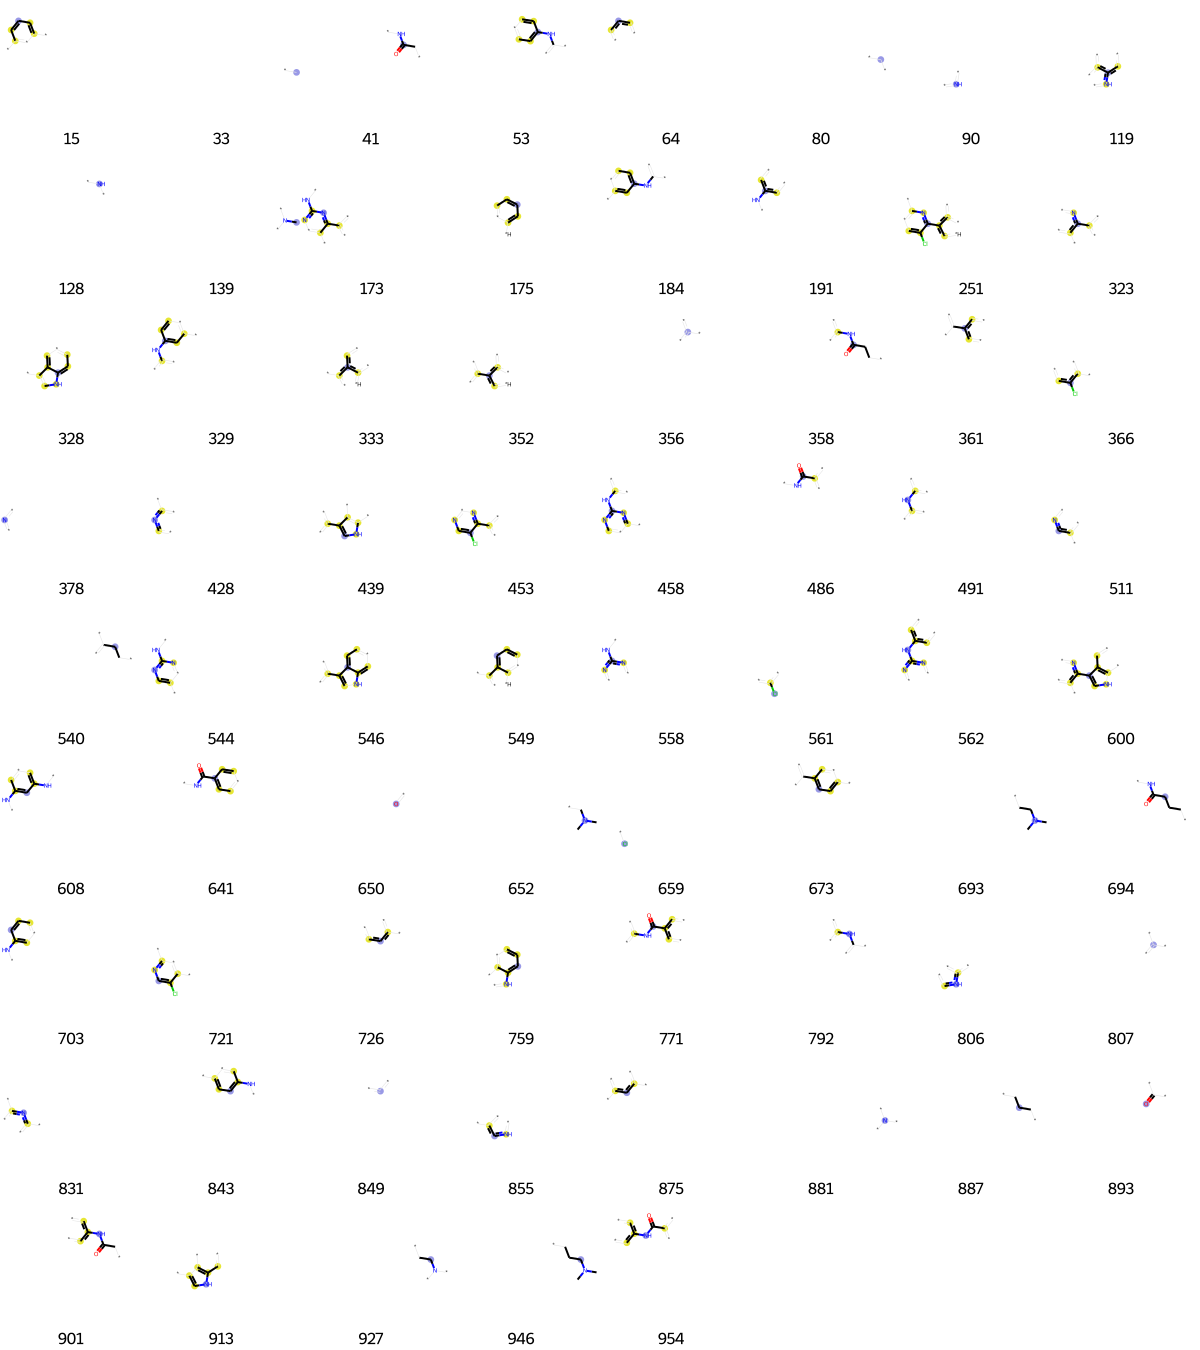

In [2107]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2108]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 80,
 145,
 147,
 214,
 289,
 294,
 356,
 361,
 498,
 578,
 606,
 650,
 673,
 695,
 698,
 726,
 745,
 754,
 759,
 807,
 849,
 893]

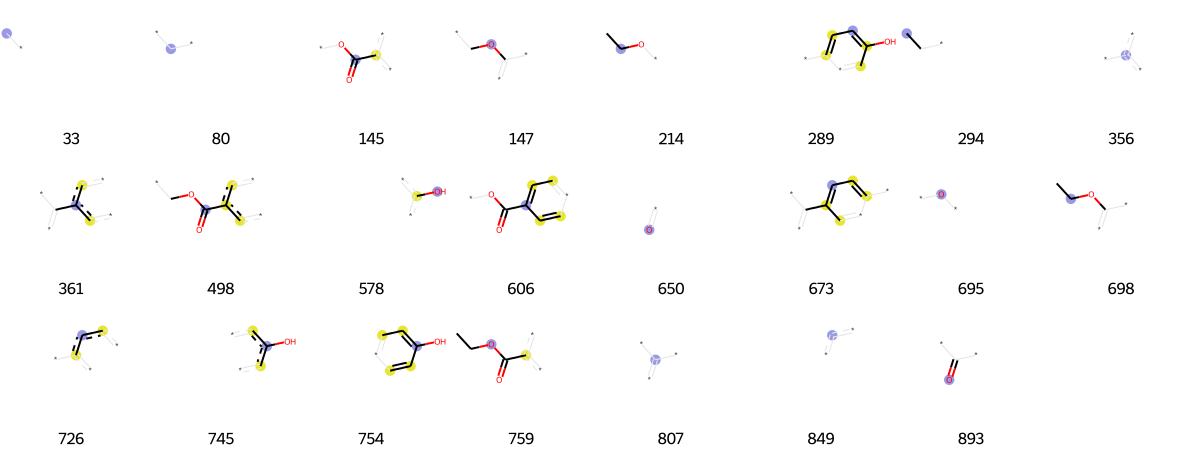

In [2109]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2110]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[33,
 53,
 248,
 289,
 356,
 366,
 367,
 377,
 381,
 561,
 578,
 659,
 666,
 698,
 726,
 745,
 807,
 849,
 875]

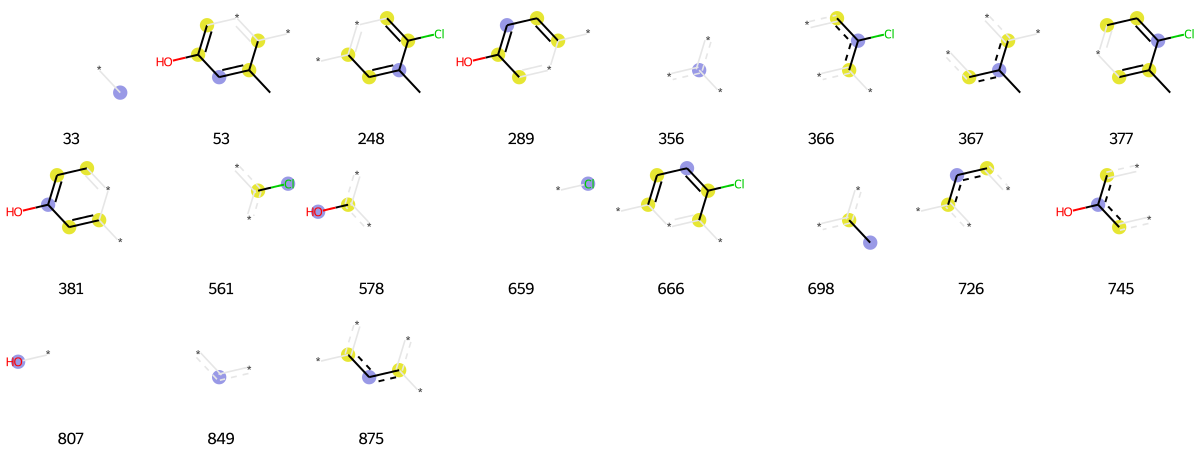

In [2111]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [2112]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[13,
 14,
 25,
 55,
 64,
 80,
 147,
 179,
 196,
 219,
 232,
 241,
 267,
 307,
 315,
 356,
 360,
 383,
 428,
 451,
 499,
 507,
 543,
 556,
 578,
 583,
 585,
 589,
 650,
 656,
 674,
 675,
 694,
 695,
 711,
 722,
 726,
 773,
 790,
 803,
 807,
 842,
 849,
 875,
 893,
 1009]

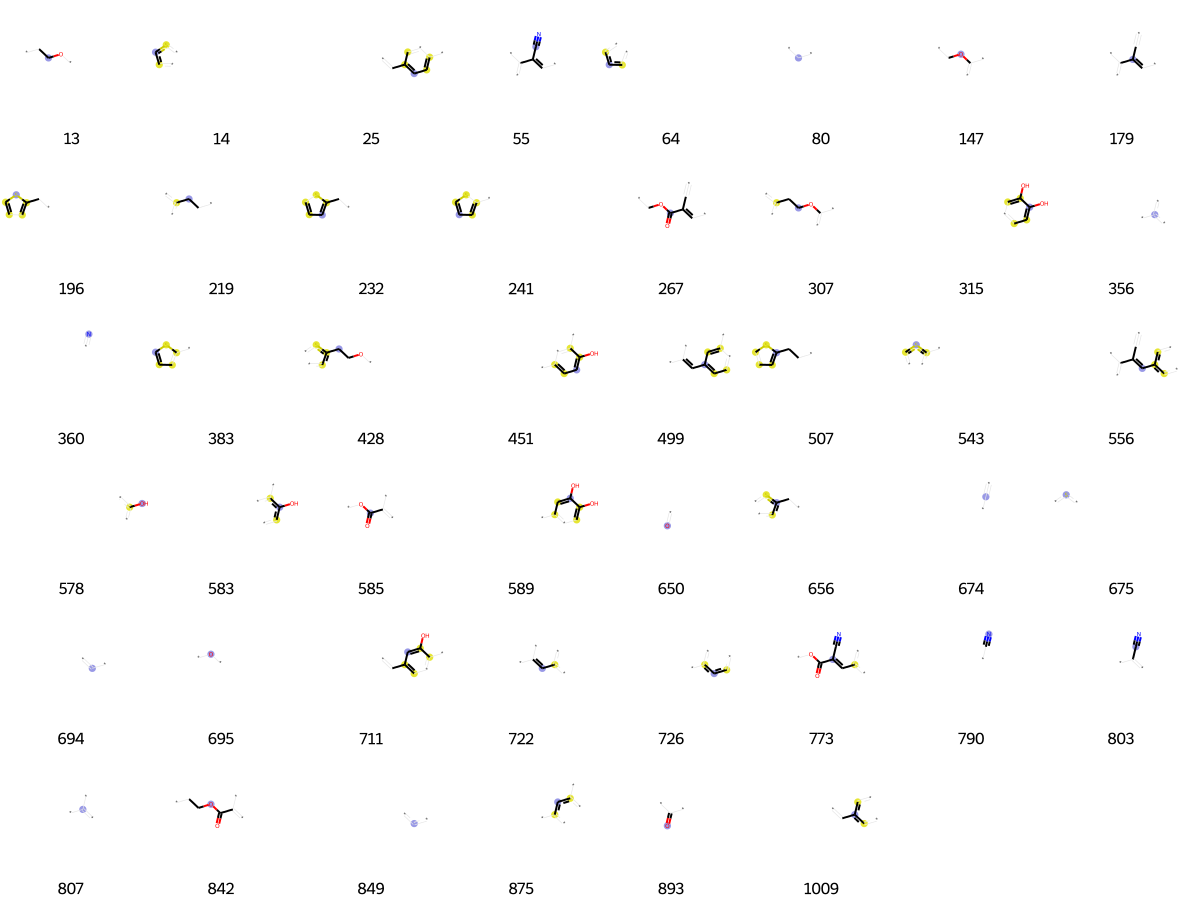

In [2113]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2114]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[39,
 80,
 133,
 147,
 162,
 197,
 240,
 310,
 356,
 378,
 406,
 428,
 433,
 460,
 511,
 538,
 567,
 607,
 625,
 635,
 656,
 675,
 725,
 726,
 728,
 730,
 849,
 909]

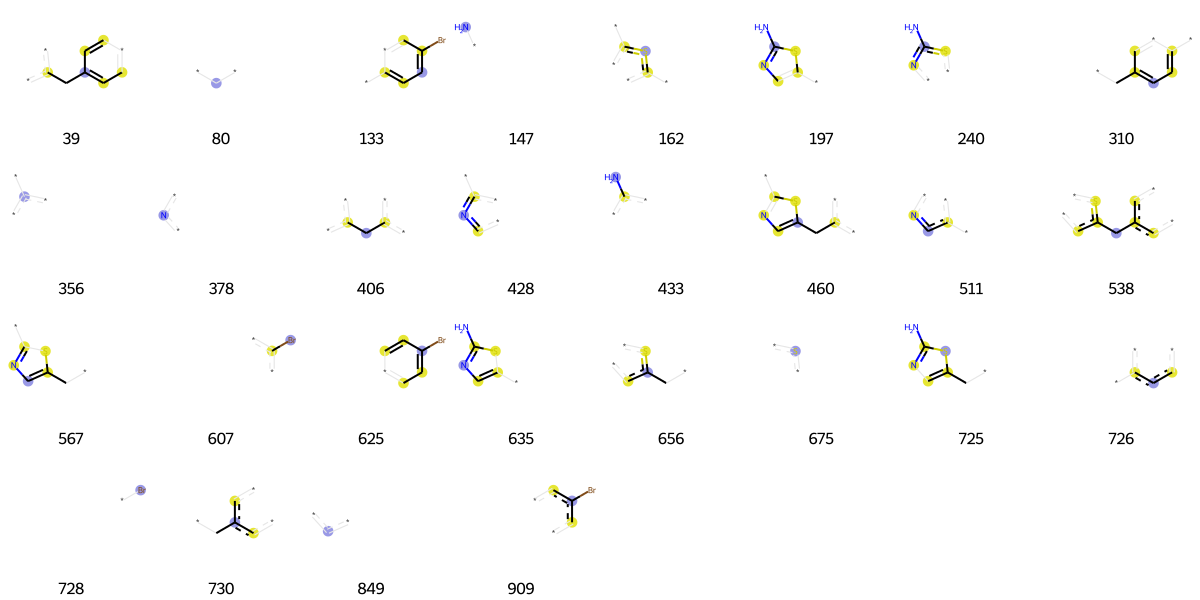

In [2115]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2116]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[1,
 7,
 13,
 32,
 33,
 36,
 42,
 46,
 57,
 64,
 75,
 79,
 80,
 114,
 118,
 128,
 137,
 175,
 283,
 288,
 322,
 356,
 360,
 361,
 364,
 378,
 389,
 428,
 456,
 486,
 511,
 539,
 650,
 653,
 664,
 673,
 695,
 702,
 726,
 730,
 744,
 771,
 792,
 807,
 841,
 849,
 857,
 875,
 893,
 967,
 1005,
 1021]

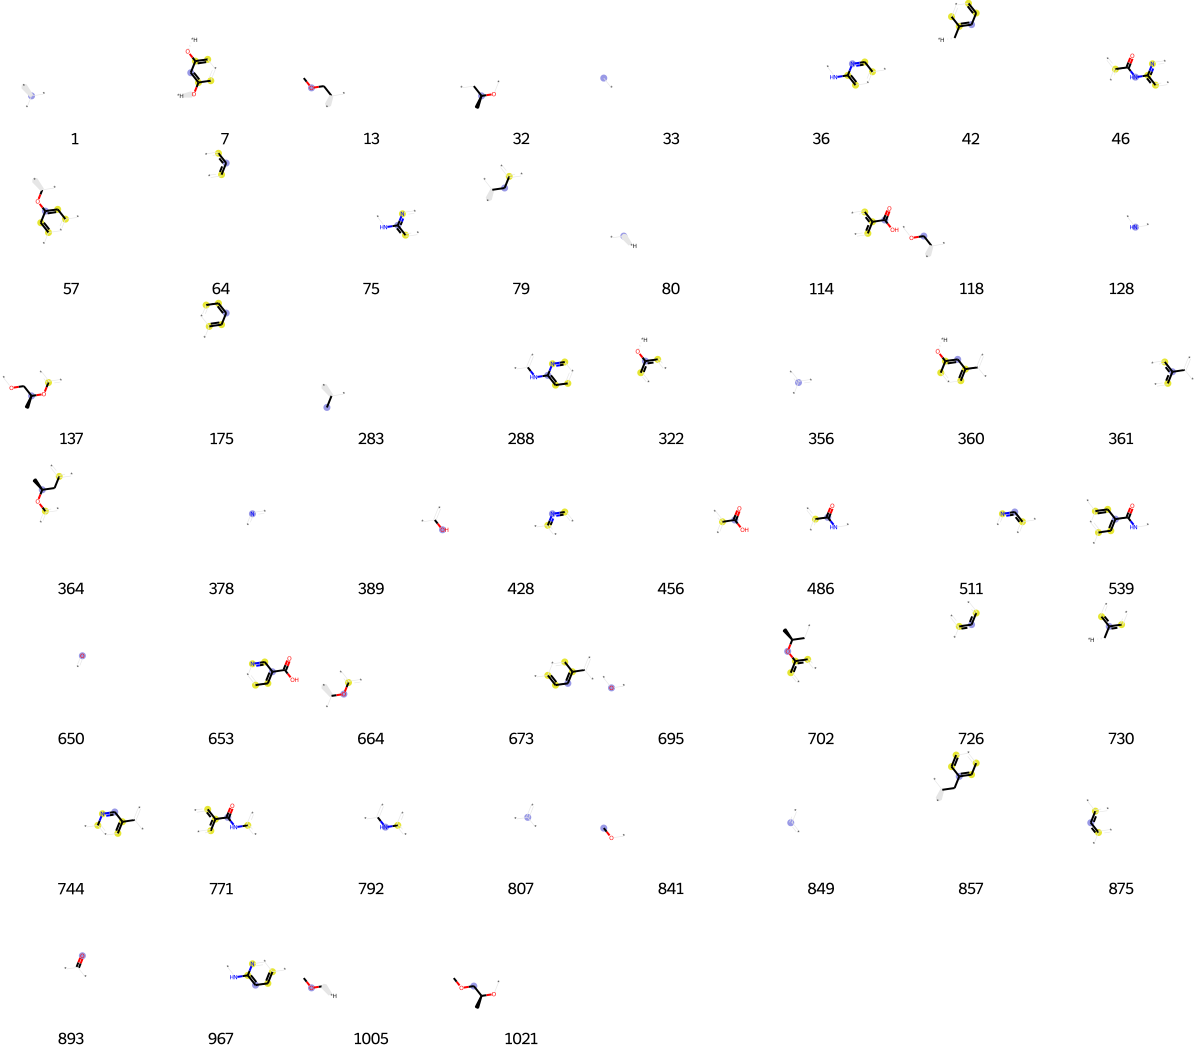

In [2117]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2118]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[51, 80, 232, 234, 263, 389, 446, 522, 540, 650, 713, 715, 807, 893]

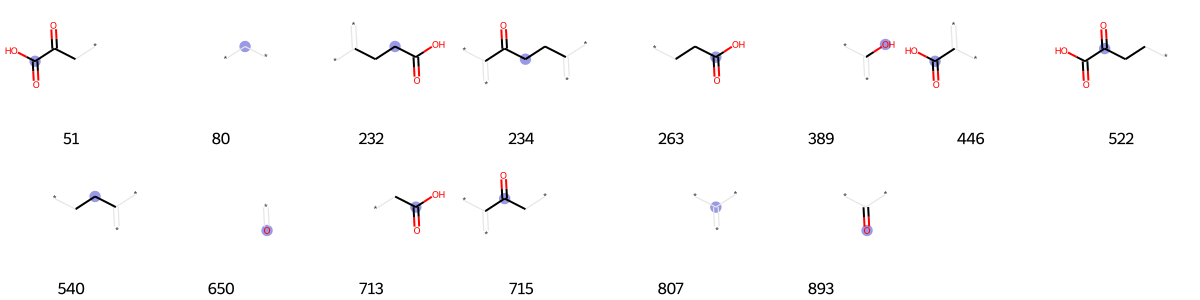

In [2119]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2120]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[33,
 36,
 51,
 80,
 84,
 88,
 122,
 129,
 138,
 155,
 182,
 188,
 195,
 222,
 233,
 242,
 250,
 262,
 294,
 301,
 314,
 333,
 356,
 362,
 408,
 412,
 450,
 465,
 470,
 479,
 504,
 507,
 519,
 529,
 540,
 588,
 622,
 640,
 650,
 679,
 695,
 714,
 718,
 769,
 773,
 794,
 807,
 841,
 849,
 860,
 893,
 897,
 914,
 926,
 973,
 990,
 1009,
 1019]

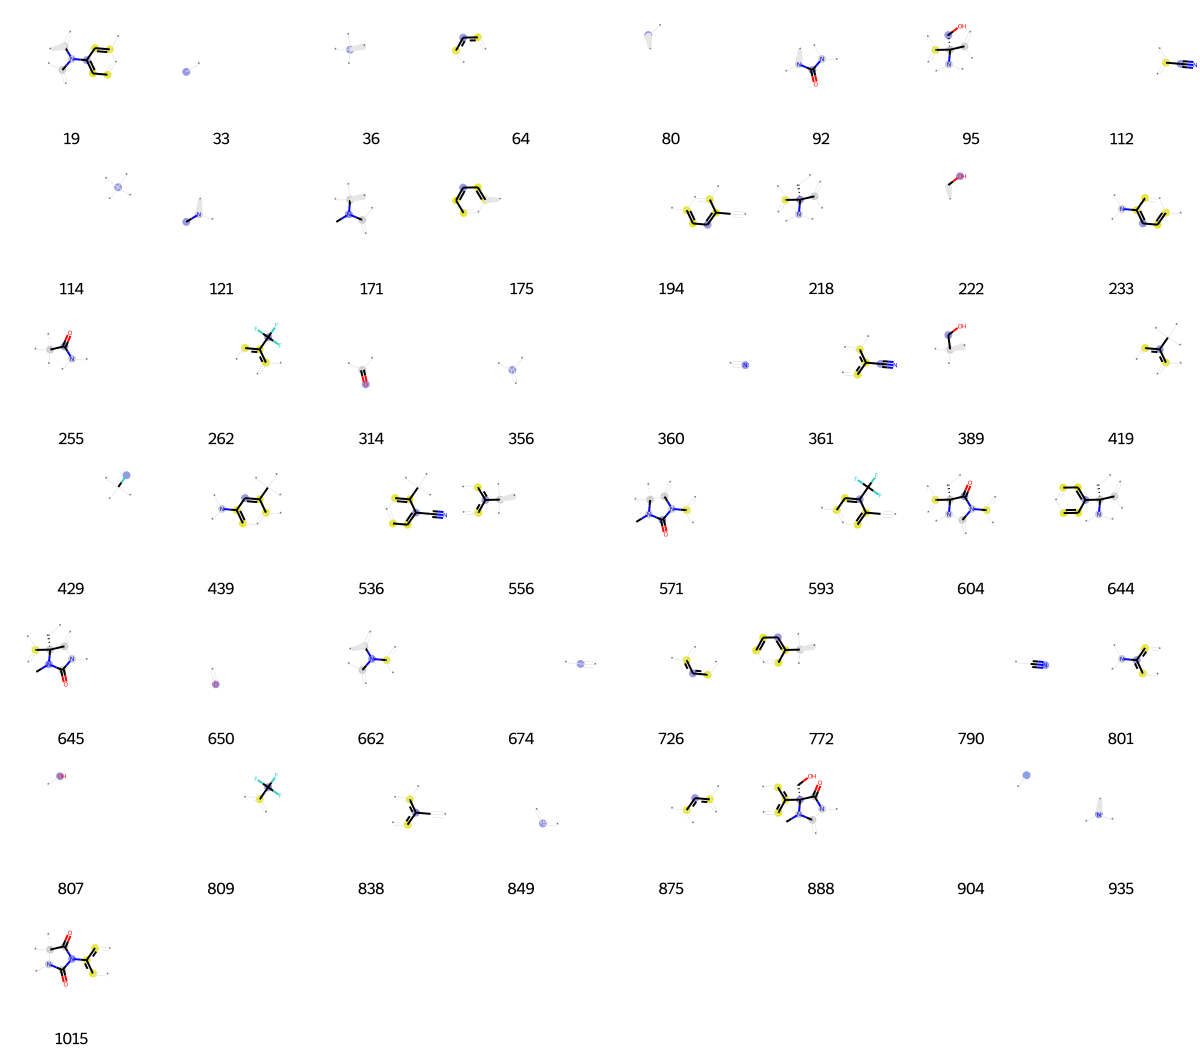

In [2121]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2122]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[1,
 33,
 36,
 75,
 77,
 80,
 106,
 128,
 158,
 222,
 233,
 246,
 251,
 294,
 297,
 314,
 356,
 378,
 492,
 498,
 573,
 577,
 606,
 610,
 640,
 650,
 656,
 681,
 688,
 694,
 697,
 726,
 739,
 740,
 783,
 792,
 794,
 800,
 807,
 831,
 849,
 853,
 863,
 893,
 897,
 904,
 905,
 935,
 942,
 955,
 973,
 1019,
 1021]

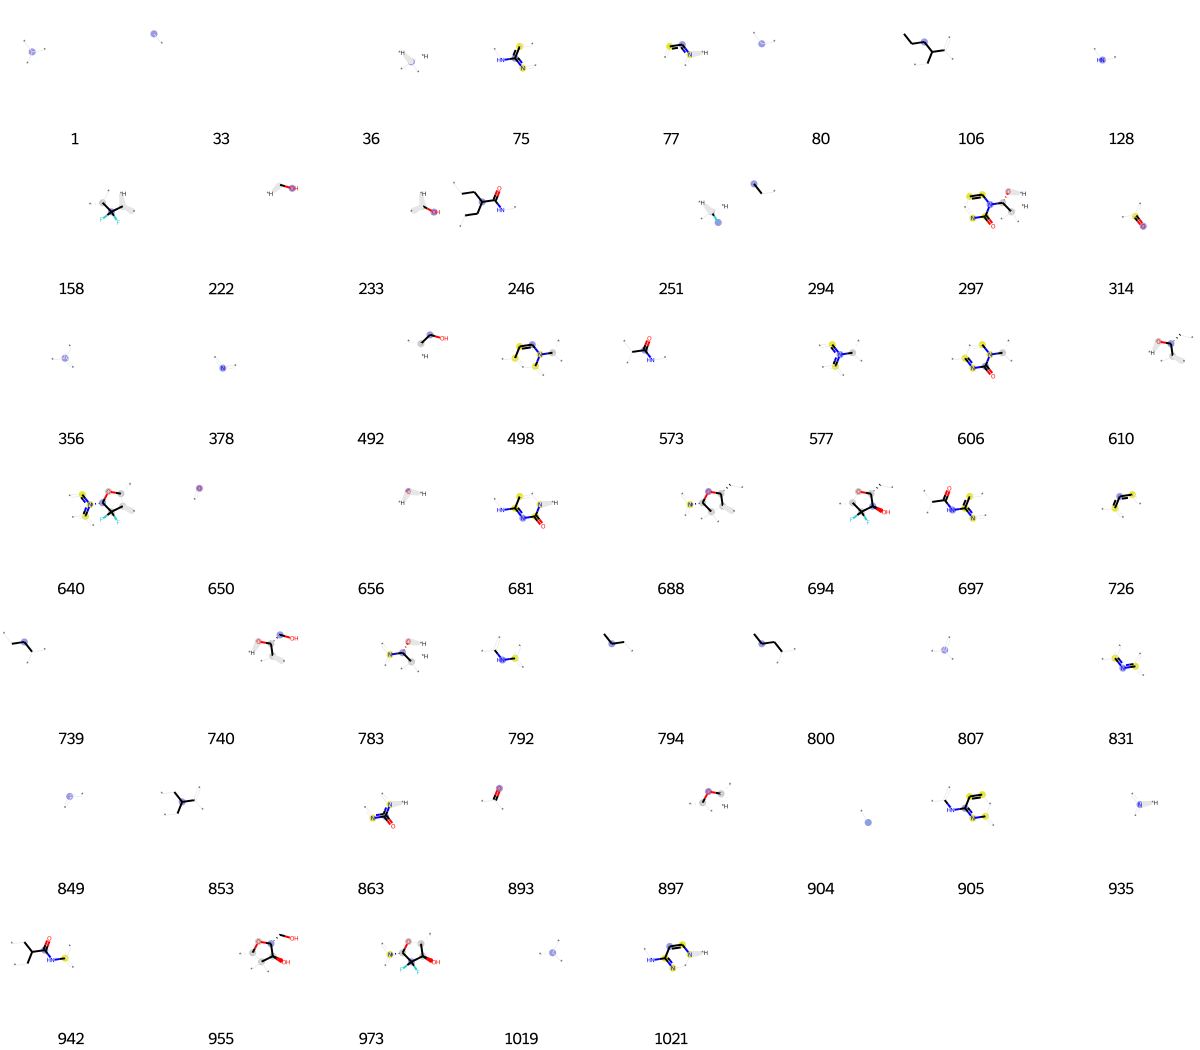

In [2123]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2124]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[26,
 33,
 80,
 90,
 114,
 121,
 128,
 140,
 163,
 197,
 202,
 245,
 246,
 255,
 256,
 279,
 310,
 314,
 351,
 354,
 356,
 378,
 380,
 386,
 392,
 419,
 486,
 490,
 495,
 504,
 534,
 549,
 564,
 578,
 580,
 598,
 638,
 646,
 649,
 650,
 656,
 698,
 699,
 709,
 726,
 730,
 743,
 758,
 807,
 813,
 831,
 841,
 849,
 893,
 904,
 928,
 935]

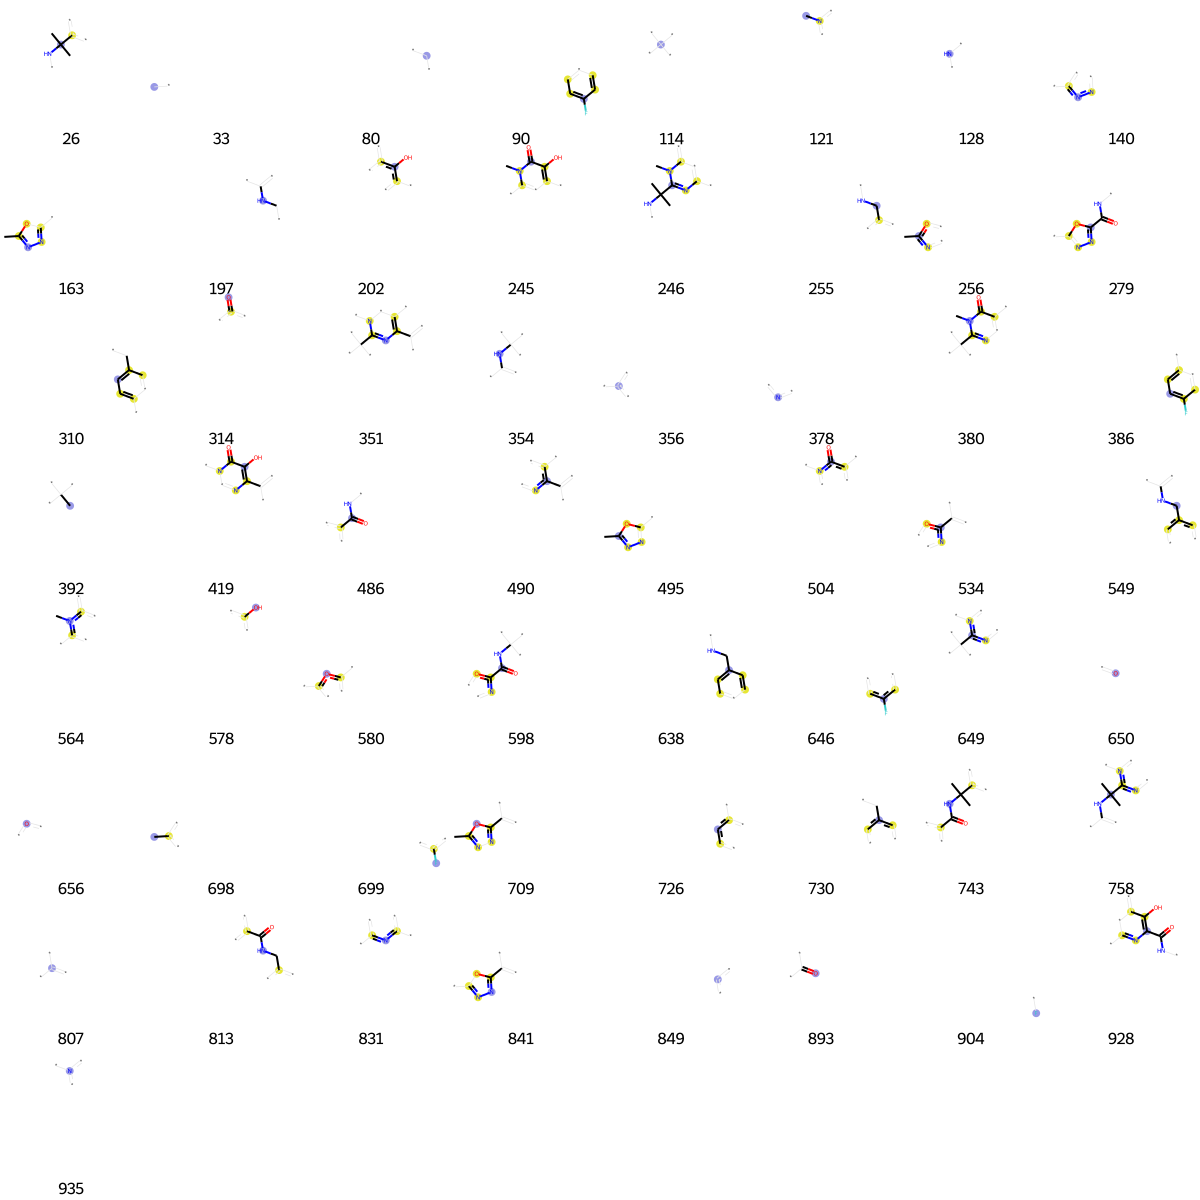

In [2125]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2126]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[10,
 33,
 36,
 90,
 101,
 226,
 250,
 285,
 301,
 314,
 356,
 516,
 650,
 816,
 940,
 950,
 1019]

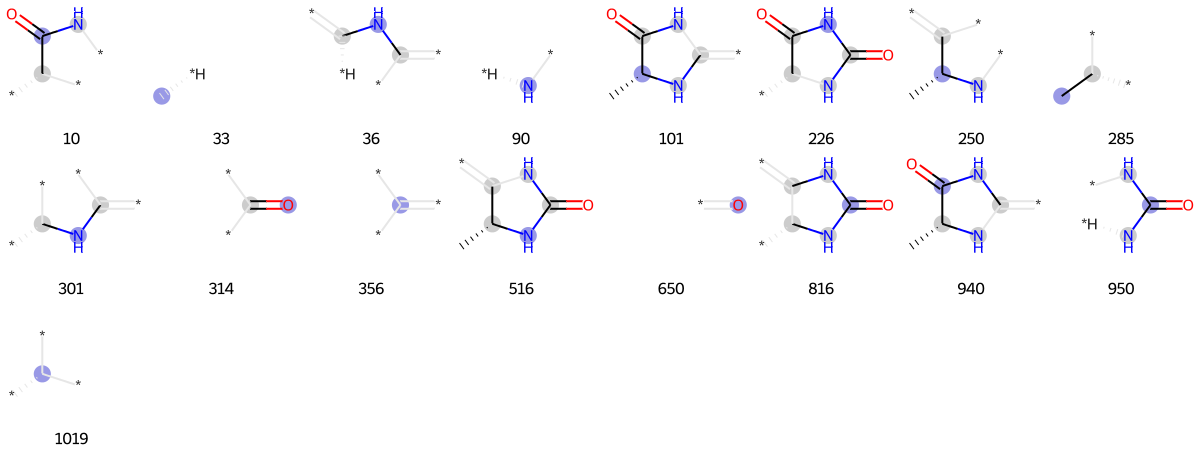

In [2127]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2128]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1, 22, 33, 114, 129, 228, 279, 429, 485, 518, 659, 695, 841, 904, 914]

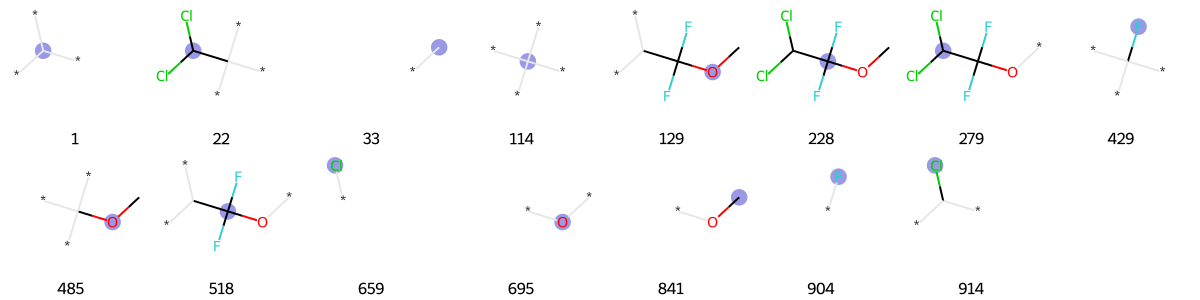

In [2129]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2130]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[33, 114, 289, 315, 356, 392, 393, 532, 578, 641, 726, 745, 754, 807, 849]

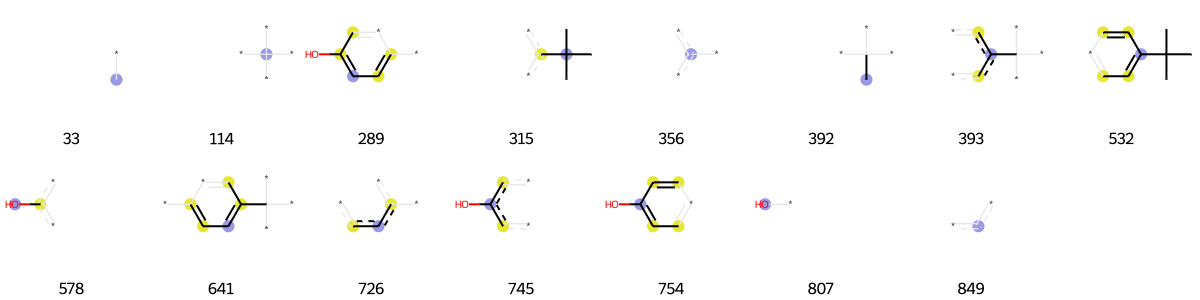

In [2131]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2132]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[33,
 42,
 80,
 128,
 147,
 162,
 167,
 209,
 231,
 240,
 274,
 277,
 294,
 301,
 324,
 356,
 378,
 433,
 514,
 545,
 546,
 600,
 610,
 667,
 675,
 714,
 790,
 794,
 812,
 814,
 831,
 866,
 924,
 926,
 960,
 1002,
 1019]

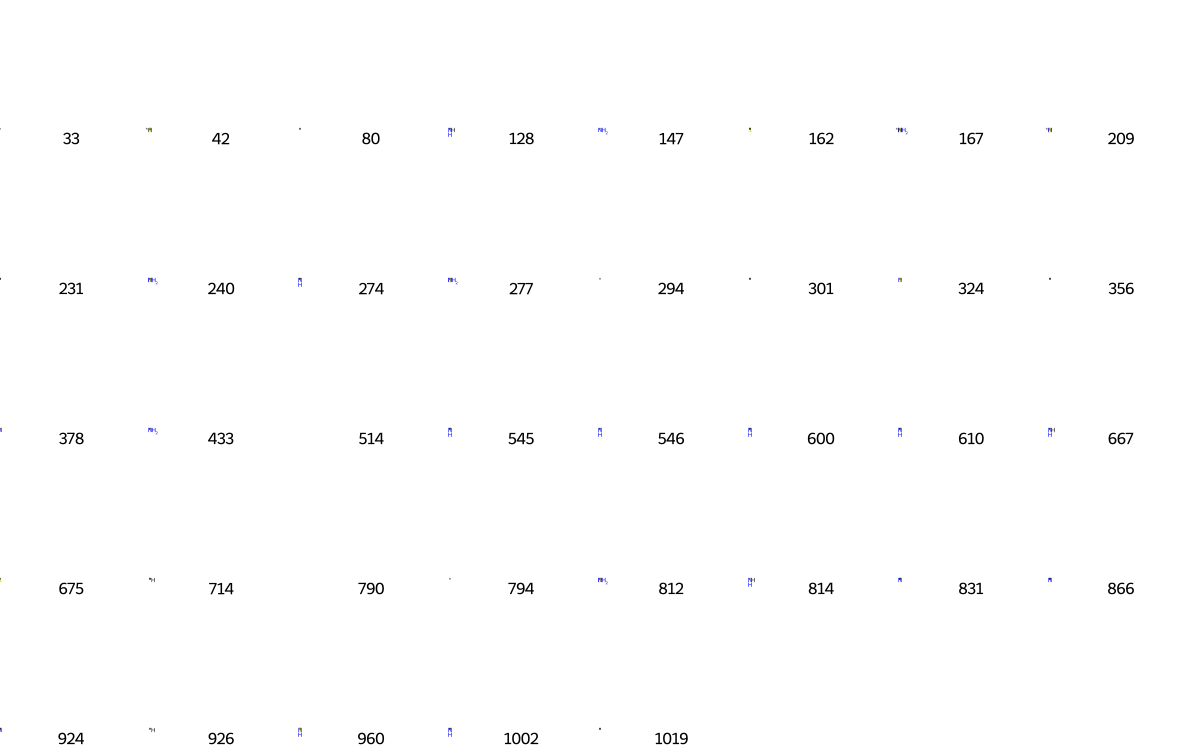

In [2133]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2134]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[2,
 4,
 5,
 80,
 92,
 128,
 197,
 301,
 314,
 323,
 339,
 356,
 389,
 390,
 416,
 439,
 650,
 689,
 713,
 731,
 735,
 747,
 782,
 794,
 807,
 886,
 890,
 893,
 898,
 926,
 935,
 969,
 1019]

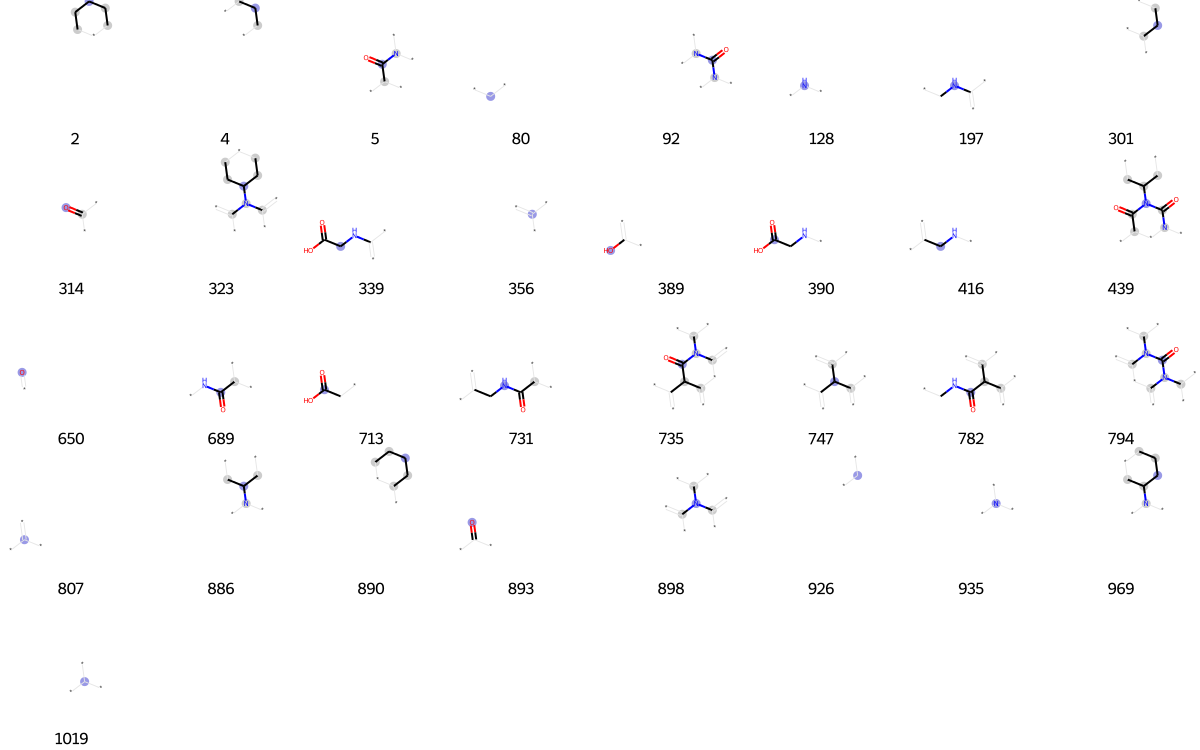

In [2135]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2136]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[8,
 13,
 33,
 45,
 73,
 74,
 80,
 121,
 130,
 136,
 160,
 193,
 205,
 222,
 227,
 266,
 294,
 311,
 314,
 356,
 378,
 392,
 407,
 428,
 448,
 456,
 458,
 463,
 473,
 484,
 494,
 504,
 511,
 512,
 546,
 600,
 637,
 650,
 653,
 691,
 695,
 701,
 726,
 744,
 749,
 767,
 794,
 802,
 807,
 830,
 831,
 841,
 849,
 870,
 875,
 896,
 926,
 935,
 968,
 980,
 983,
 997]

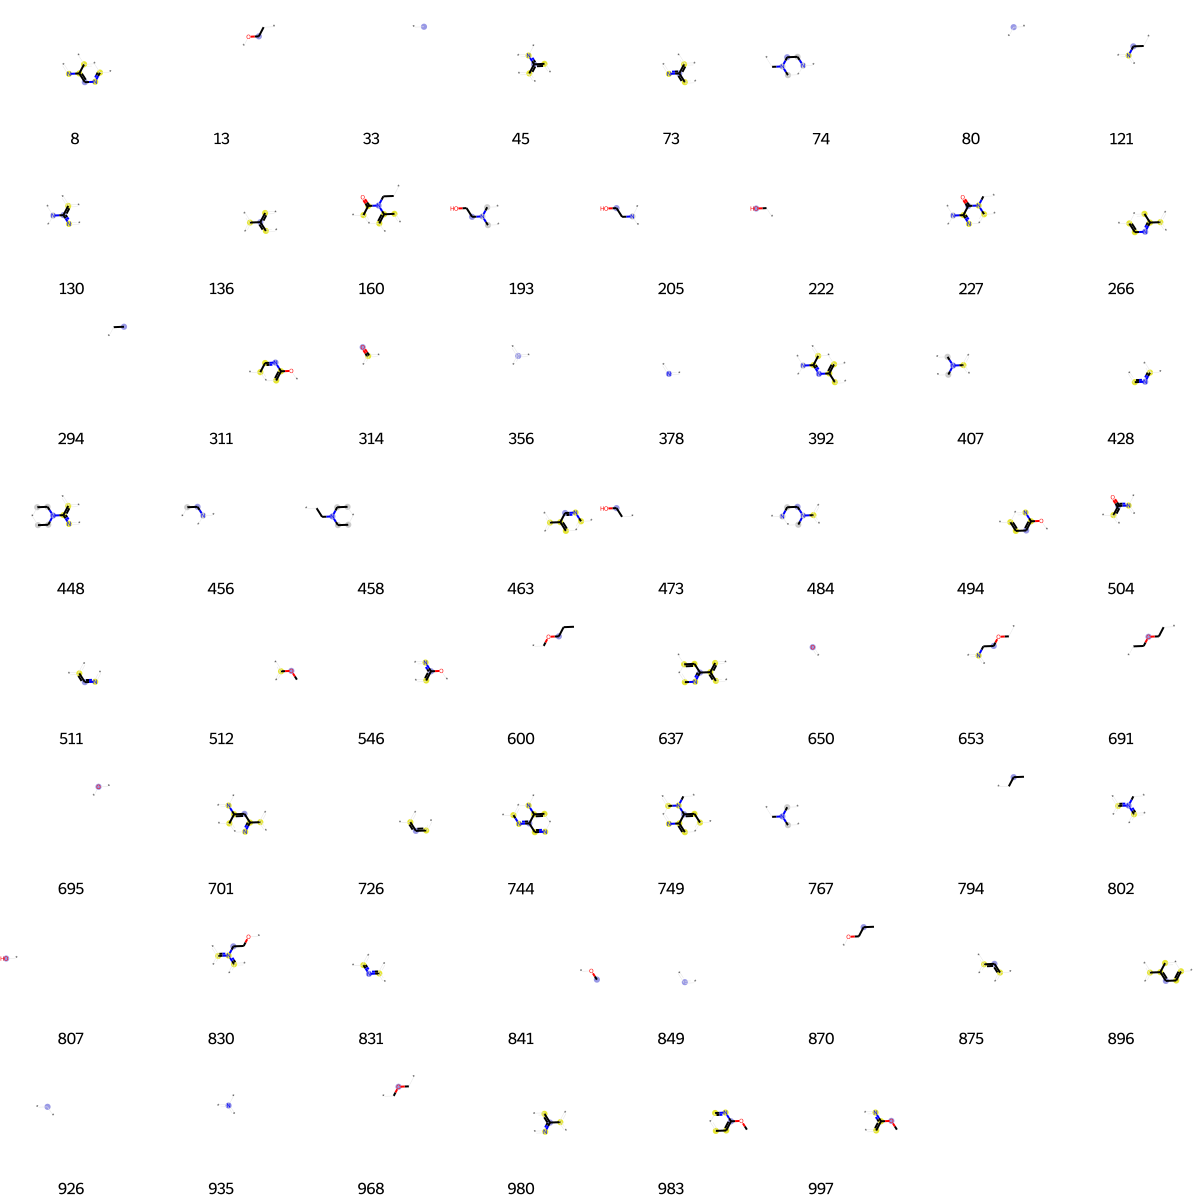

In [2137]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2138]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 13,
 33,
 78,
 80,
 117,
 128,
 156,
 248,
 263,
 294,
 347,
 355,
 356,
 361,
 366,
 378,
 389,
 404,
 411,
 420,
 460,
 486,
 526,
 530,
 540,
 559,
 561,
 591,
 645,
 650,
 659,
 666,
 673,
 695,
 713,
 726,
 736,
 739,
 767,
 794,
 807,
 841,
 849,
 875,
 881,
 887,
 893,
 927,
 935,
 955,
 978,
 1005]

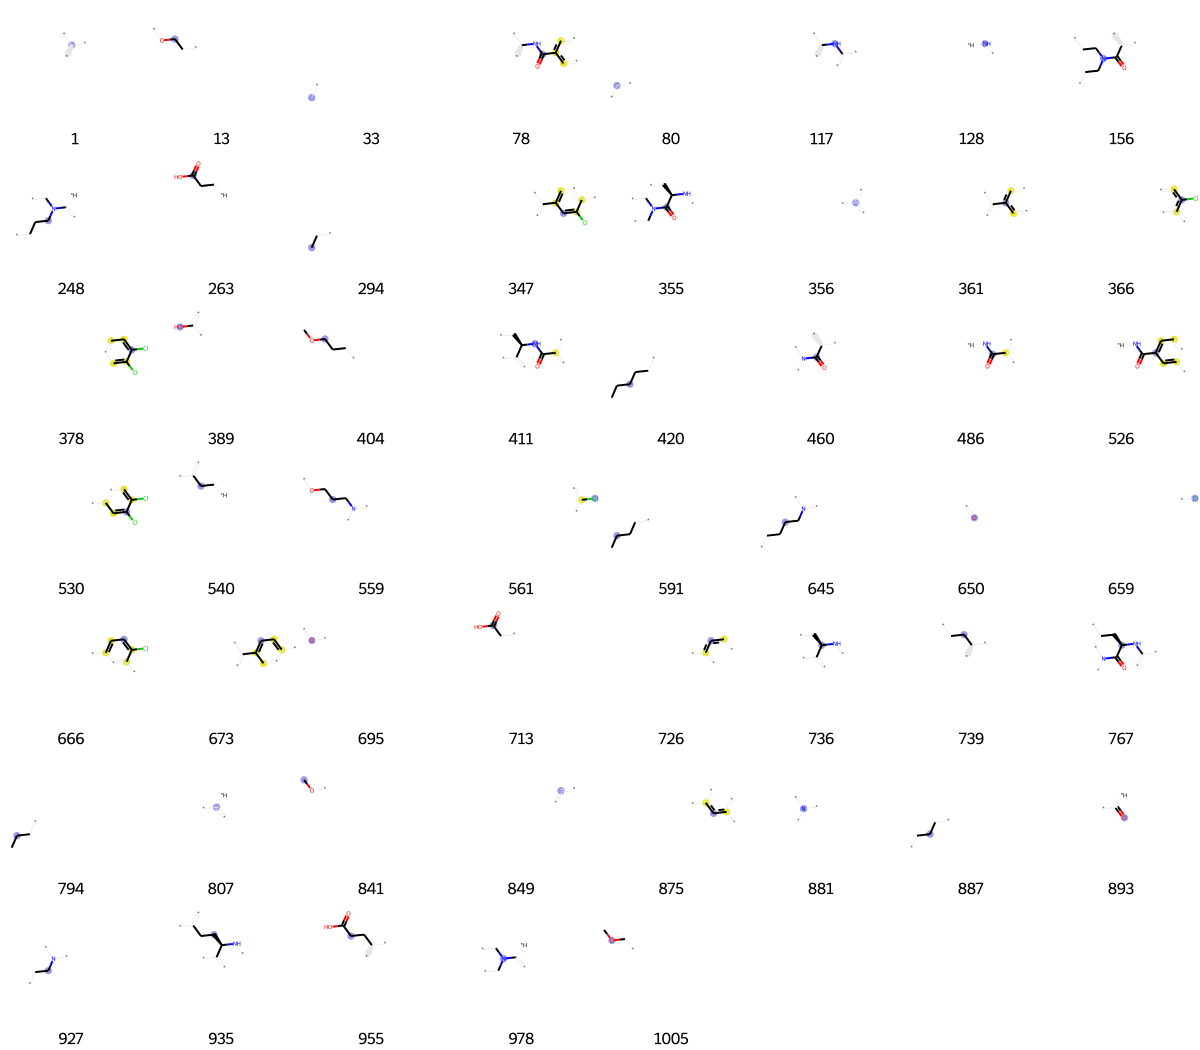

In [2139]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2140]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[4,
 15,
 30,
 31,
 33,
 36,
 38,
 41,
 64,
 102,
 128,
 130,
 138,
 192,
 200,
 234,
 236,
 242,
 249,
 286,
 301,
 356,
 397,
 430,
 456,
 519,
 524,
 583,
 593,
 602,
 639,
 650,
 665,
 674,
 695,
 698,
 710,
 726,
 799,
 807,
 813,
 841,
 849,
 875,
 893,
 926,
 935,
 987,
 1013,
 1019]

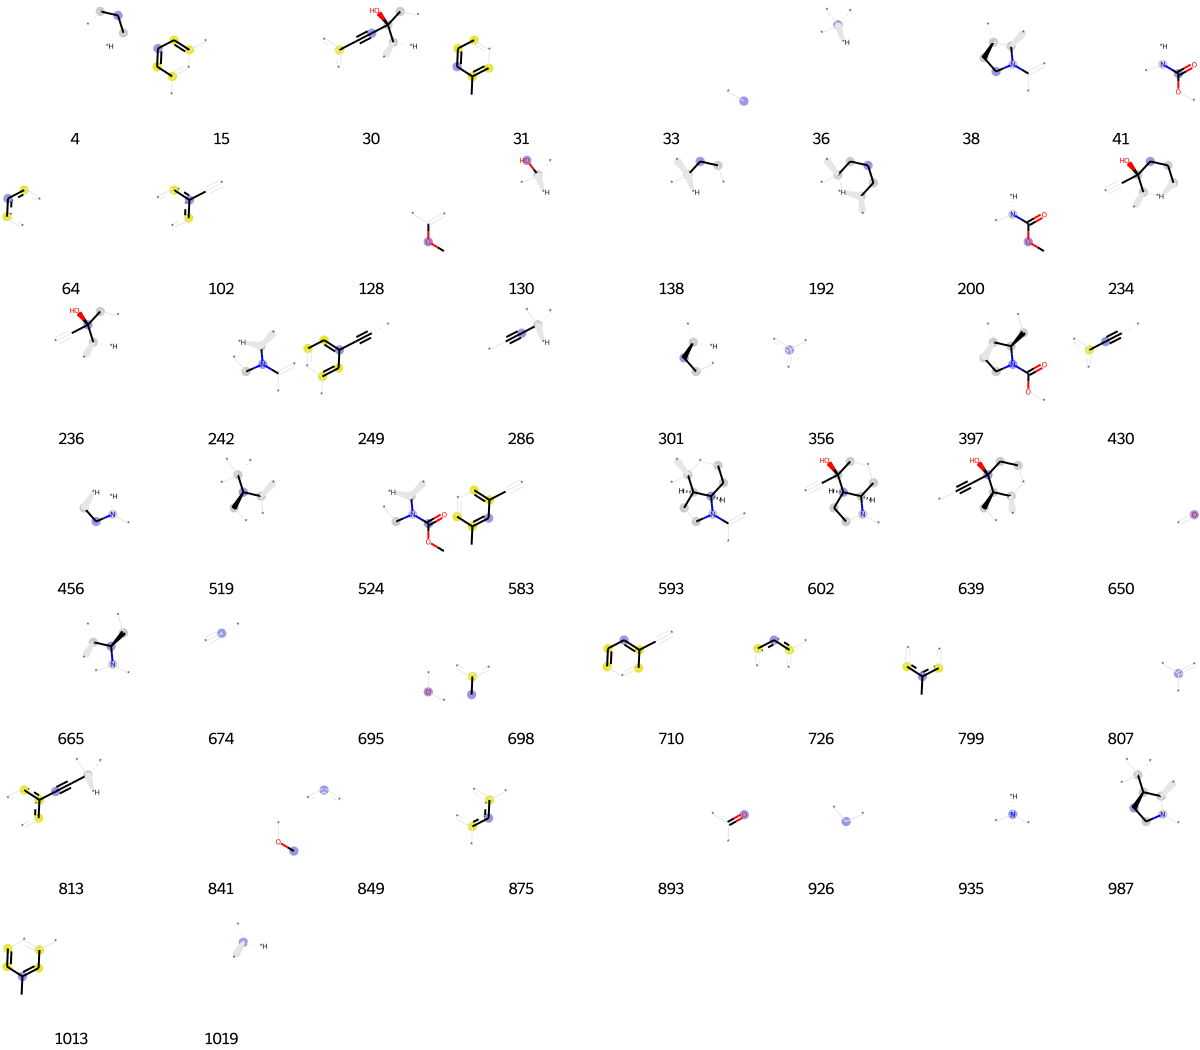

In [2141]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2142]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[33,
 46,
 51,
 53,
 56,
 128,
 136,
 139,
 168,
 175,
 191,
 232,
 278,
 301,
 317,
 356,
 361,
 378,
 381,
 407,
 417,
 456,
 480,
 487,
 497,
 523,
 644,
 650,
 652,
 656,
 673,
 719,
 726,
 792,
 807,
 809,
 831,
 843,
 849,
 881,
 891,
 893,
 896,
 926,
 935,
 942,
 950,
 965,
 966,
 985,
 1014,
 1019]

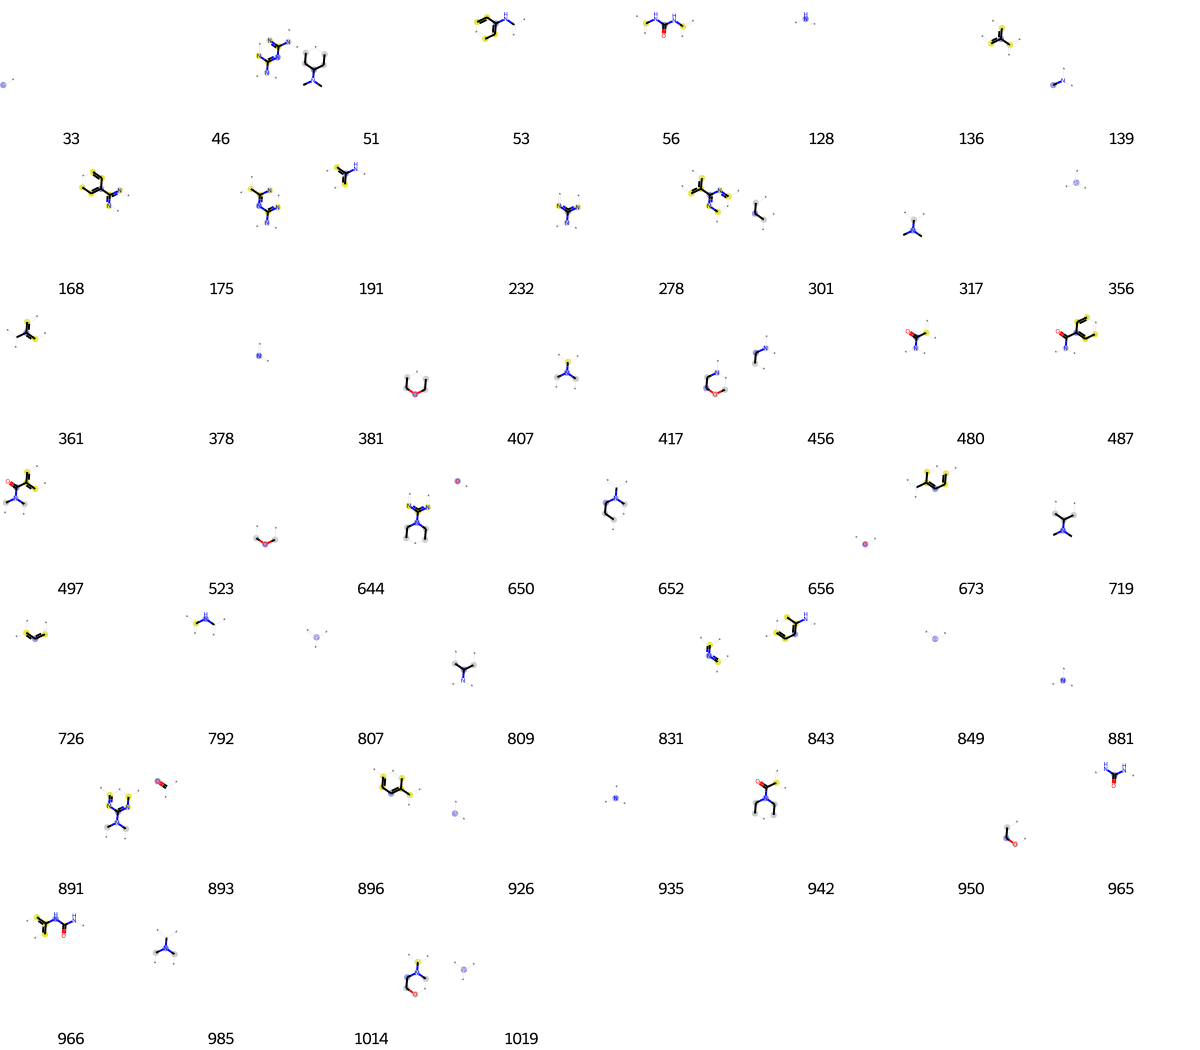

In [2143]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])